In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Exploring data on community issues

## Load the SAT dataset and describe it

### With the *csv* module and put it in a Python dictionary

In [3]:
## Load dataset
sat_scores_raw = pd.read_csv('./sat_scores.csv')
## Transform df for dict
sat_scores =  sat_scores_raw.set_index('State').T
sat_scores_dict = sat_scores.to_dict()
## Delete total row
del sat_scores_dict['All']
sat_scores_dict

{'AK': {'Math': 510, 'Rate': 51, 'Verbal': 514},
 'AL': {'Math': 554, 'Rate': 9, 'Verbal': 559},
 'AR': {'Math': 550, 'Rate': 6, 'Verbal': 562},
 'AZ': {'Math': 525, 'Rate': 34, 'Verbal': 523},
 'CA': {'Math': 517, 'Rate': 51, 'Verbal': 498},
 'CO': {'Math': 542, 'Rate': 31, 'Verbal': 539},
 'CT': {'Math': 510, 'Rate': 82, 'Verbal': 509},
 'DC': {'Math': 474, 'Rate': 56, 'Verbal': 482},
 'DE': {'Math': 499, 'Rate': 67, 'Verbal': 501},
 'FL': {'Math': 499, 'Rate': 54, 'Verbal': 498},
 'GA': {'Math': 489, 'Rate': 63, 'Verbal': 491},
 'HI': {'Math': 515, 'Rate': 52, 'Verbal': 485},
 'IA': {'Math': 603, 'Rate': 5, 'Verbal': 593},
 'ID': {'Math': 542, 'Rate': 17, 'Verbal': 543},
 'IL': {'Math': 589, 'Rate': 12, 'Verbal': 576},
 'IN': {'Math': 501, 'Rate': 60, 'Verbal': 499},
 'KS': {'Math': 580, 'Rate': 9, 'Verbal': 577},
 'KY': {'Math': 550, 'Rate': 12, 'Verbal': 550},
 'LA': {'Math': 562, 'Rate': 7, 'Verbal': 564},
 'MA': {'Math': 515, 'Rate': 79, 'Verbal': 511},
 'MD': {'Math': 510, 'Rat

### Descriptive stats function for dictionary keys

In [4]:
# prints return statement
def printf(x):
    print x
    
# Calculate descriptive stats for each variable in dataframe
def summary_stat(nested_key, main_key, dataframe):
    
    # creates values list consisting of the value for each key's nested_key  
    totals_list = []
    for index, val in enumerate(dataframe):
        total = dataframe[main_key[index]][nested_key]
        totals_list.append(total)
    
    # calculate mean
    mean = str(round(np.mean(totals_list),2))
    # calculate median
    median = str(np.median(totals_list))
    # calculate mode
    rounded = np.round(totals_list)
    mode = str(stats.mode(rounded))
    # calculate variance
    variance = str(round(np.var(totals_list),2))
    # calculate standard deviation
    std = str(round(np.std(totals_list),2))
    # return stats statement
    return (printf('{}:\tMean: {}\n\tMedian: {}'
                   '\n\tMode: {}\n\tVariance: {}\n\tStandard deviation'
                   ': {}\n'.format(nested_key, mean, median, mode, variance, std)))
    

# Get the state name keys
state_keys = sat_scores.keys()

# Get the data keys
data_keys =sat_scores_raw.columns[1:4]

# Goes through each data key and passes them one-by-one 
# along with the state name keys and df 
# to summary_stat function
for feature in data_keys:
    summary_stat(feature, state_keys, sat_scores_dict)

Rate:	Mean: 37.0
	Median: 33.0
	Mode: ModeResult(mode=array([4]), count=array([3]))
	Variance: 744.16
	Standard deviation: 27.28

Verbal:	Mean: 532.53
	Median: 527.0
	Mode: ModeResult(mode=array([562]), count=array([3]))
	Variance: 1091.11
	Standard deviation: 33.03

Math:	Mean: 531.84
	Median: 525.0
	Mode: ModeResult(mode=array([499]), count=array([6]))
	Variance: 1290.96
	Standard deviation: 35.93



### Make a pandas DataFrame object with the SAT dictionary

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. 

In [5]:
# make dataframe from dictionary
dict_df = pd.DataFrame(sat_scores_dict)
dict_df.dtypes

AK    int64
AL    int64
AR    int64
AZ    int64
CA    int64
CO    int64
CT    int64
DC    int64
DE    int64
FL    int64
GA    int64
HI    int64
IA    int64
ID    int64
IL    int64
IN    int64
KS    int64
KY    int64
LA    int64
MA    int64
MD    int64
ME    int64
MI    int64
MN    int64
MO    int64
MS    int64
MT    int64
NC    int64
ND    int64
NE    int64
NH    int64
NJ    int64
NM    int64
NV    int64
NY    int64
OH    int64
OK    int64
OR    int64
PA    int64
RI    int64
SC    int64
SD    int64
TN    int64
TX    int64
UT    int64
VA    int64
VT    int64
WA    int64
WI    int64
WV    int64
WY    int64
dtype: object

### Make a pandas DataFrame object with the pandas function

In [6]:
# Make dataframe directly from .csv file
sat_scores_df = pd.read_csv('./sat_scores.csv')
## Drop totals row
sat_scores_df.drop(sat_scores_df.index[51:], inplace=True, axis=0)

print sat_scores_df.dtypes
sat_scores_df
# Each key becomes a column, including State
# all values are int64

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

**What is the difference between loading from file and inputting this dictionary (if any)?**

---
> Keys become the column headers, including State, and the nested keys are the rows 

> All values are integers

### What does our data describe?


You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_scores_df.head(10)
# the data shows the SAT score information for each state
# This includes the average verbal and math scores for each state and their overall rating

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

>The data shows the SAT score information for each state

>This includes the average verbal and math scores for each state and their overall rating


## Create a "data dictionary" based on the data

---

A dictionary object that describes the data. 
>Includes: variable name (column), variable type, variable description, dataset shape

In [8]:
# make a list of column names in dataframe
column_names = [s for s in sat_scores_df.columns]

# create a dictionary of each column including its type
data_dict1={}
data_dict2={}
for col in column_names:
    data_dict2 = {col :  [sat_scores_df[col].dtypes]}
    data_dict1.update(data_dict2)

## Add the description of each column to dictionary
data_dict1['State'].append('state')
data_dict1['Rate'].append('State rating')
data_dict1['Math'].append('Average state math score')
data_dict1['Verbal'].append('Average state verbal score')

In [9]:
# Add column details to 'column' dictionary  
data_dict = {}
data_dict['Columns'] = data_dict1
# Add shape of df to dictionary 
data_dict['Shape'] = sat_scores_df.shape
pprint (data_dict)

{'Columns': {'Math': [dtype('int64'), 'Average state math score'],
             'Rate': [dtype('int64'), 'State rating'],
             'State': [dtype('O'), 'state'],
             'Verbal': [dtype('int64'), 'Average state verbal score']},
 'Shape': (51, 4)}


## Plot the data using seaborn

### Distributions for *Rate, Math, and Verbal*

In [10]:
def plot_dist(col, color):
    plt.subplots(figsize=(12,5))
    sns.distplot(sat_scores_df[col],kde=False,bins=10, color = color,
                 hist_kws=dict(alpha=.8))
    plt.title(col, fontsize=18)
    plt.xlabel('Distribution of state SAT '+str(col), fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12);

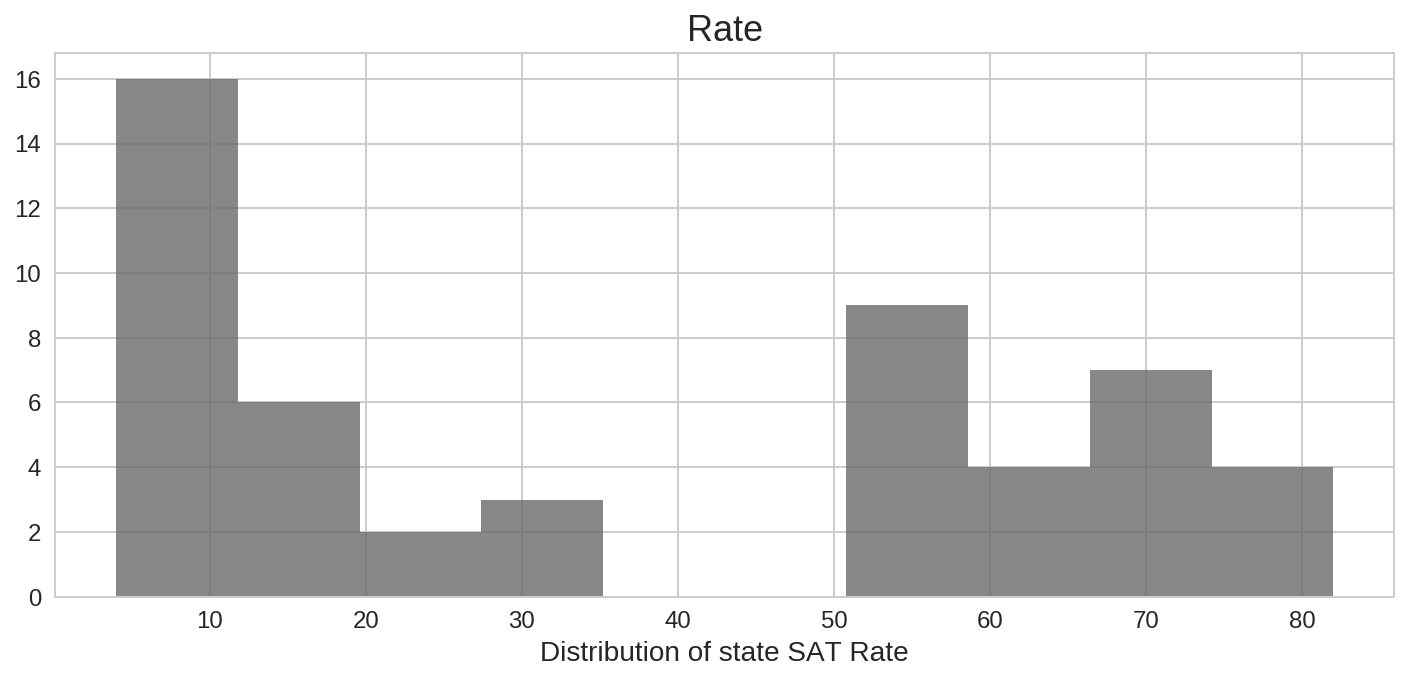

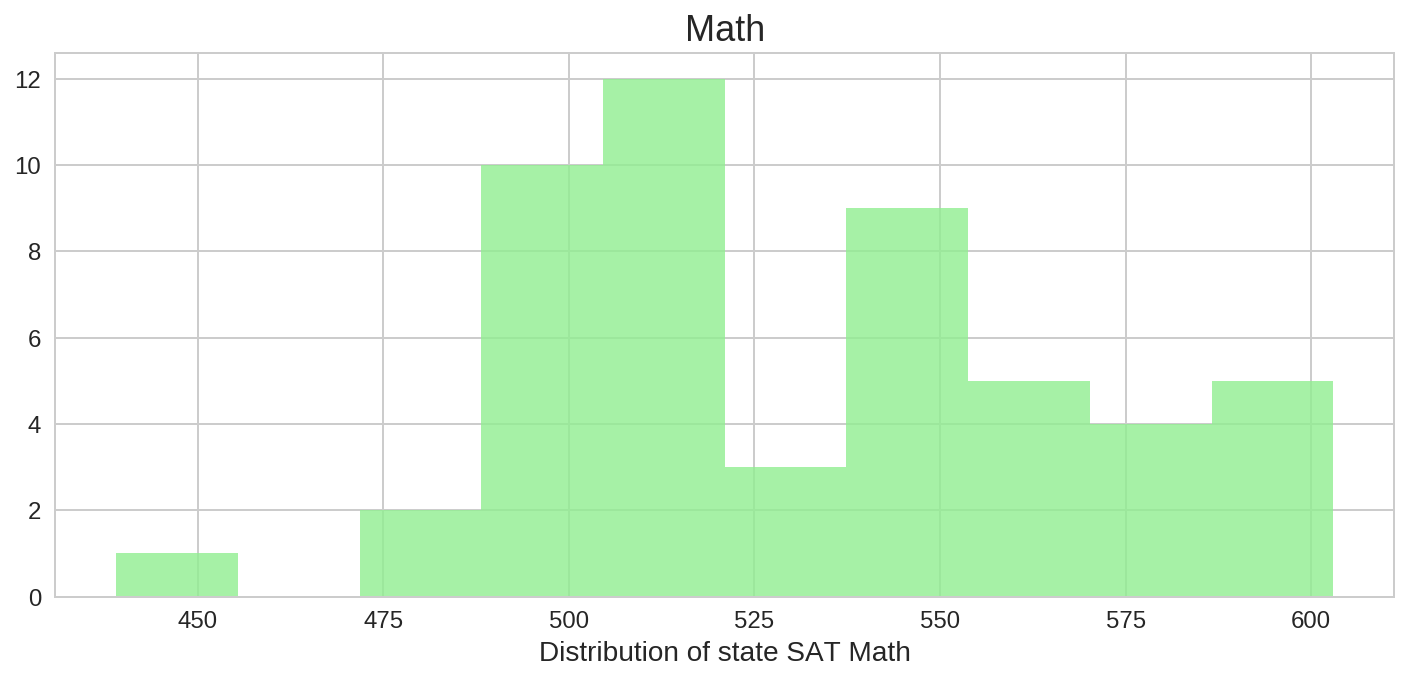

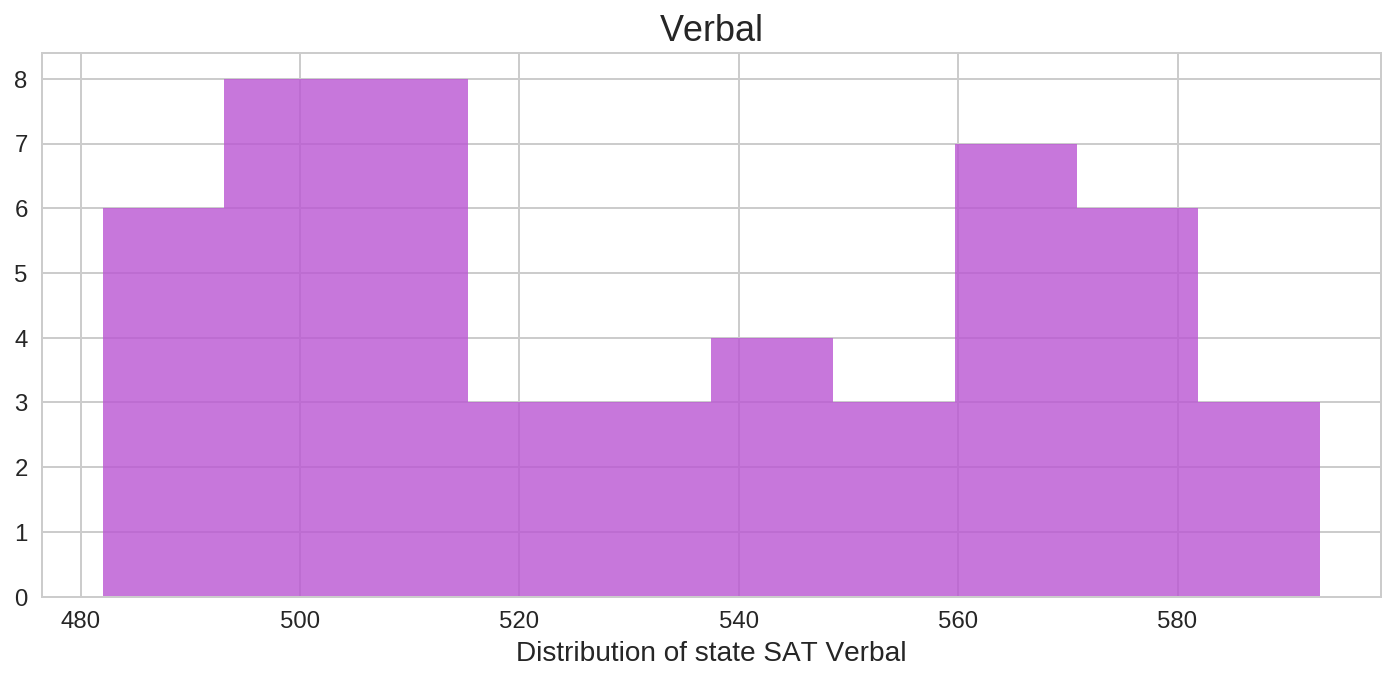

In [11]:
plot_dist('Rate','dimgray')
plot_dist('Math','lightgreen')
plot_dist('Verbal','mediumorchid')

** Evaluation of distributions**

>Rate has a bimodal distribution with two main groupings clustering aat the ends

>Math has a more normal distribution of scores 

>Verbal also has more of a bimodal distribution with two peaks in the distribution 

### Show the joint distributions for each of *Rate, Math and Verbal*

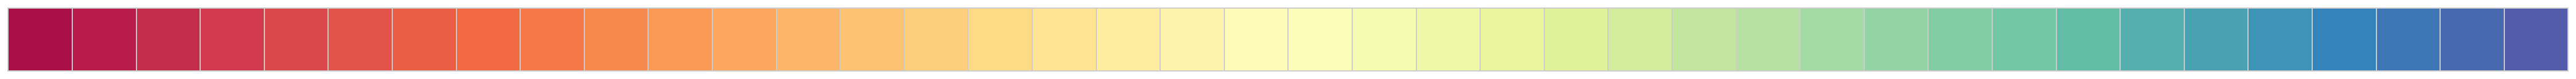

In [12]:
## Se the colour palette for the plot to show discrete steps in data
colour_palette = 'Spectral'
steps = 40
sns.palplot(sns.color_palette(colour_palette,steps))
c = sns.color_palette(colour_palette,steps)

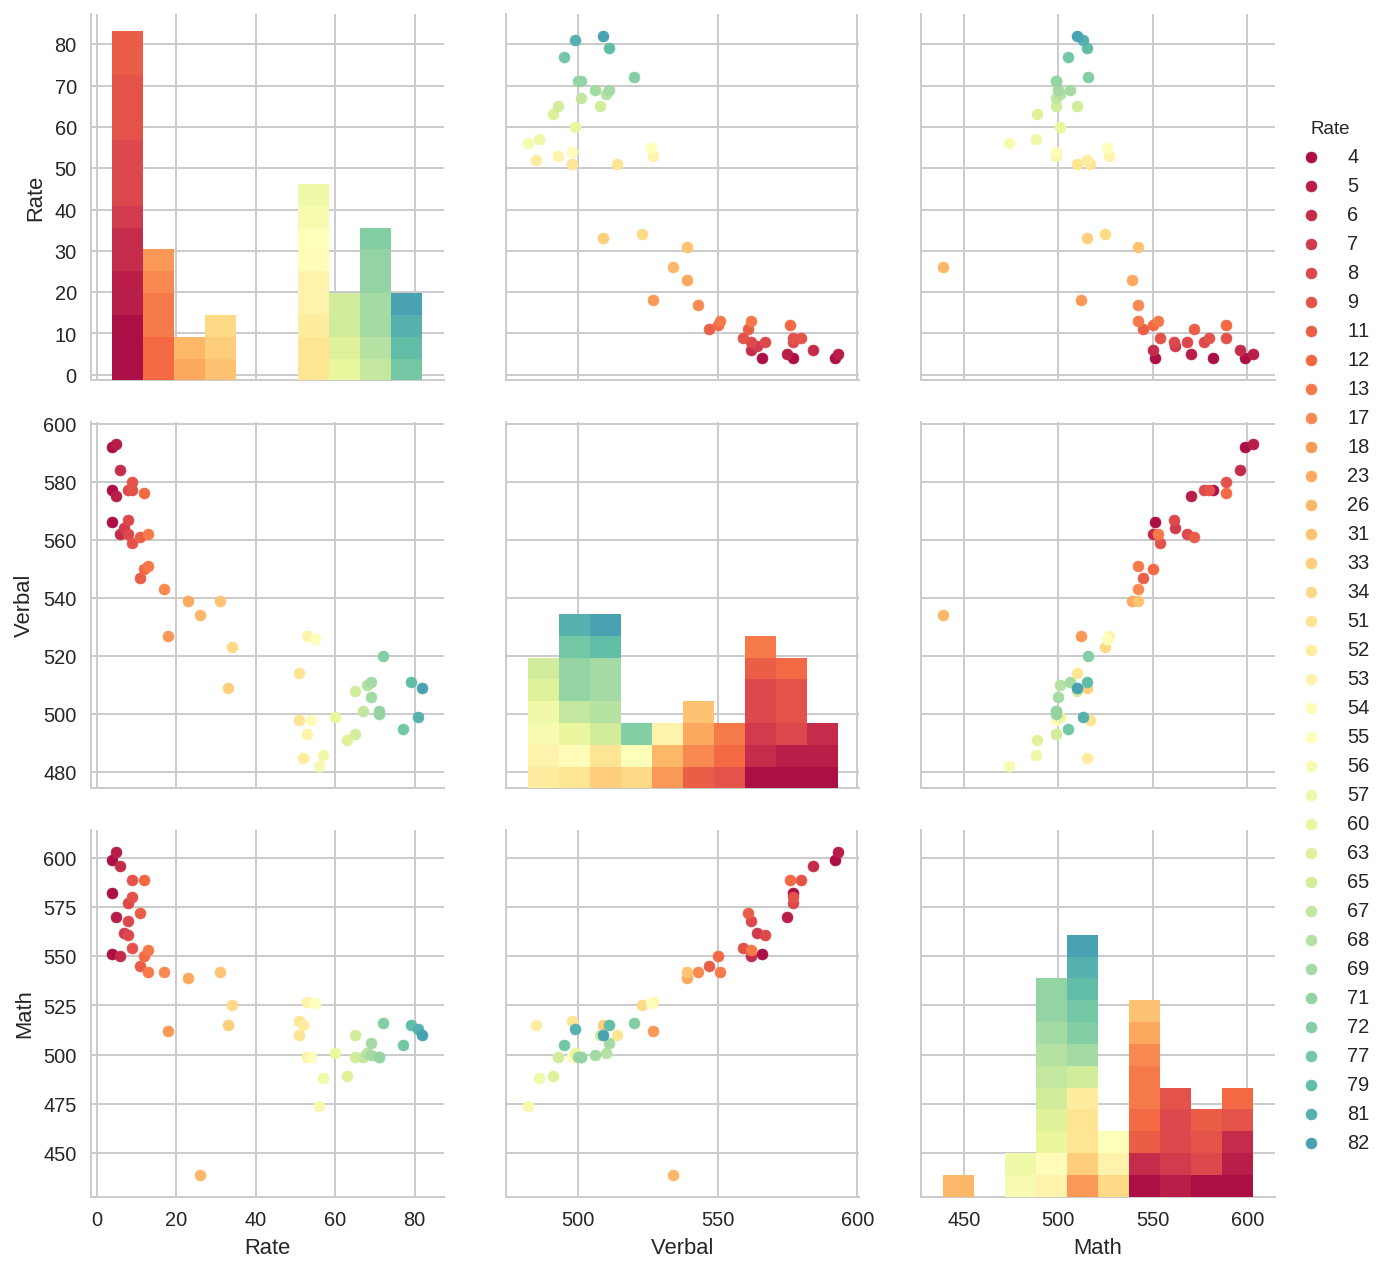

In [29]:
## Plot column variable relationships to one another 
g = sns.PairGrid(sat_scores_df, hue='Rate', palette=c, size=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=30)
g.add_legend();

**What does the visualisation say about the data?** 
> As scores for Math and Verbal in crease, state ratings decrease. States with higher math and verbal scores tend to have a lower overall state rating.

> This would imply that lower state rating scores mean better test results and thus better students

## Plot the data using built-in pandas functions

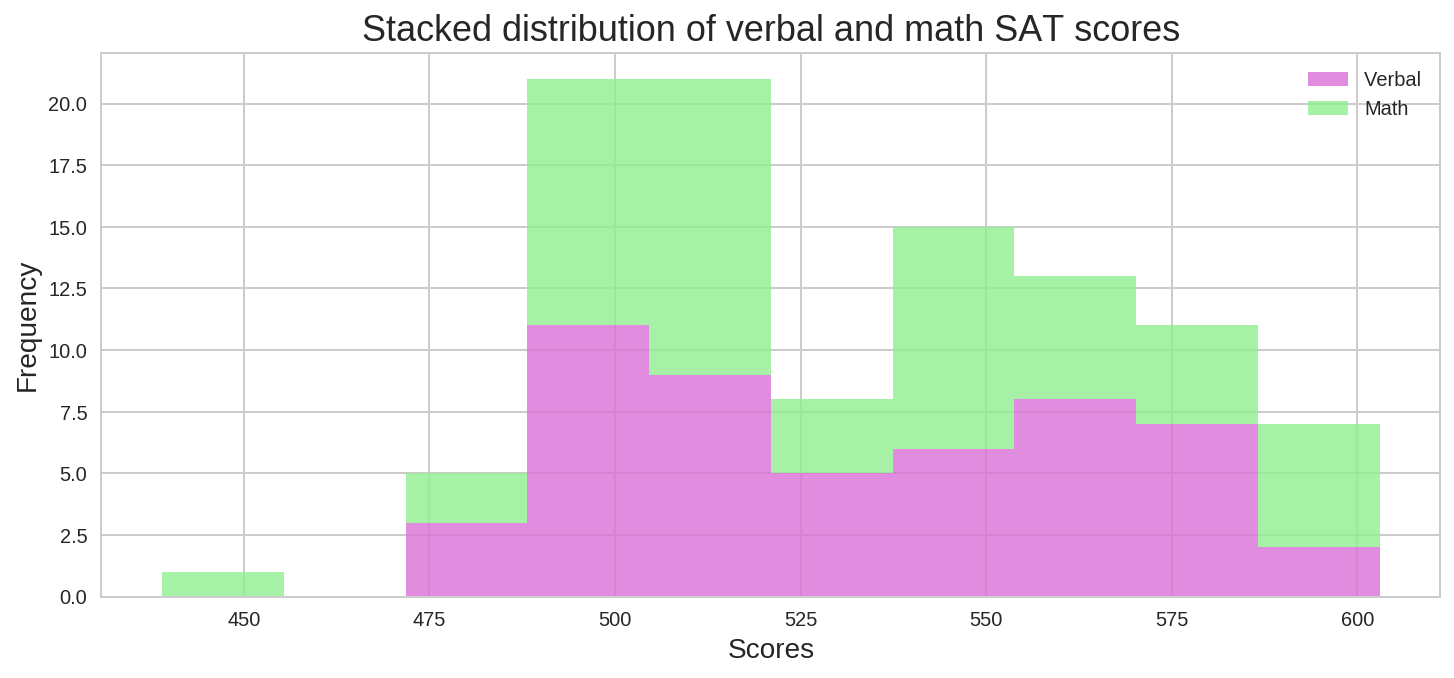

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sat_scores_df[['Verbal','Math']].plot(kind='hist',stacked=True, color=('orchid','lightgreen'), alpha=.8, ax=ax)
plt.title('Stacked distribution of verbal and math SAT scores',fontsize=18)
plt.xlabel('Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### Plot *Verbal* and *Math* on the same chart using boxplots

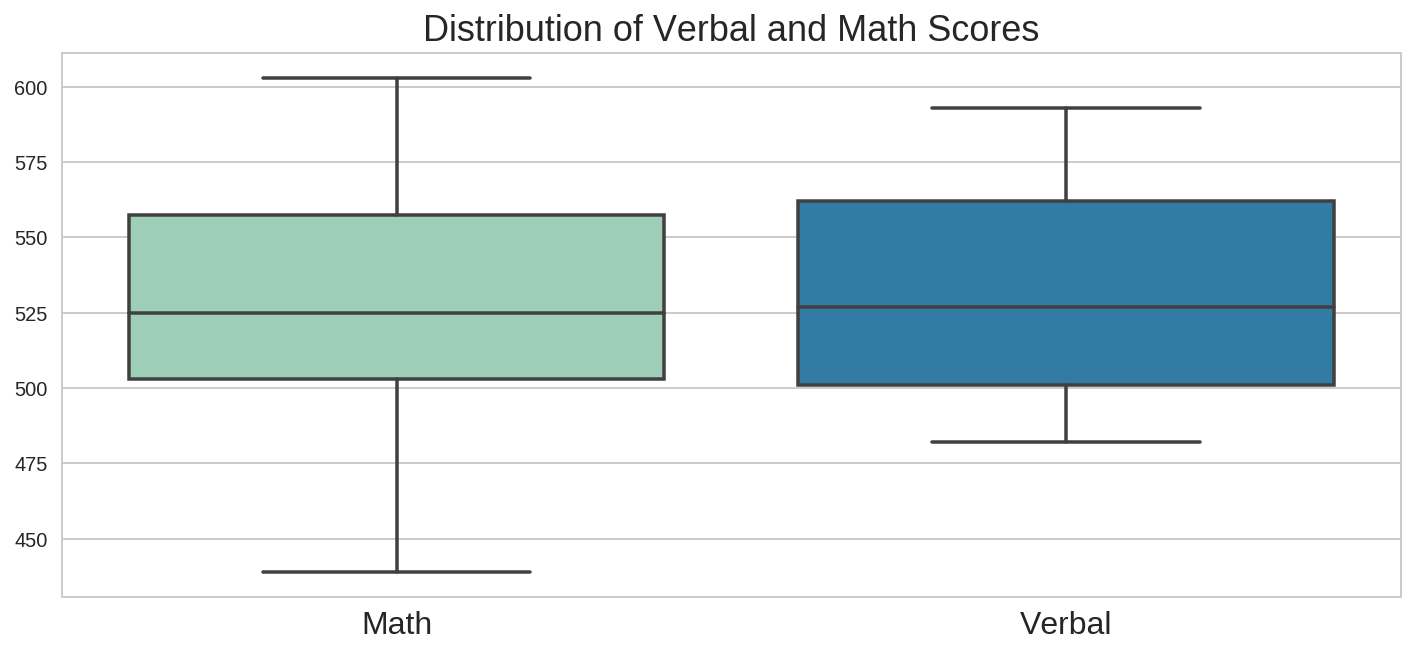

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=sat_scores_df[['Math','Verbal']], orient='v', palette='YlGnBu')
plt.title('Distribution of Verbal and Math Scores', fontsize=18)
plt.xticks(fontsize=16);

**What are the benefits of using a boxplot as compared to a scatterplot or a histogram?**

>The boxplot is easier to read when comparing the two variables. We can see that they have similar medians while Math has a greater range of scores compared to Verbal.

**What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?**

>Rate is not measured the same way as Verbal and Math so a boxplot with all three variables does not provide any useful information 

### Plot *Verbal*, *Math*, and *Rate* appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [47]:
# Standardise all variables with z-score so they appear in line on the boxplot
# This allows the distribution and range of each variable to be easily visualised in one plot

# Make new dataframe with required variables 
z_df = pd.DataFrame(sat_scores_df.drop('State',axis=1))

# Iterate through each column, calculate z-score
# remove old column from df after calculation
for col in z_df.columns:
    name = 'z_'+col
    z_df[name] = (z_df[col] - z_df[col].mean())/z_df[col].std(ddof=0)
    z_df = z_df.drop(col, axis=1)

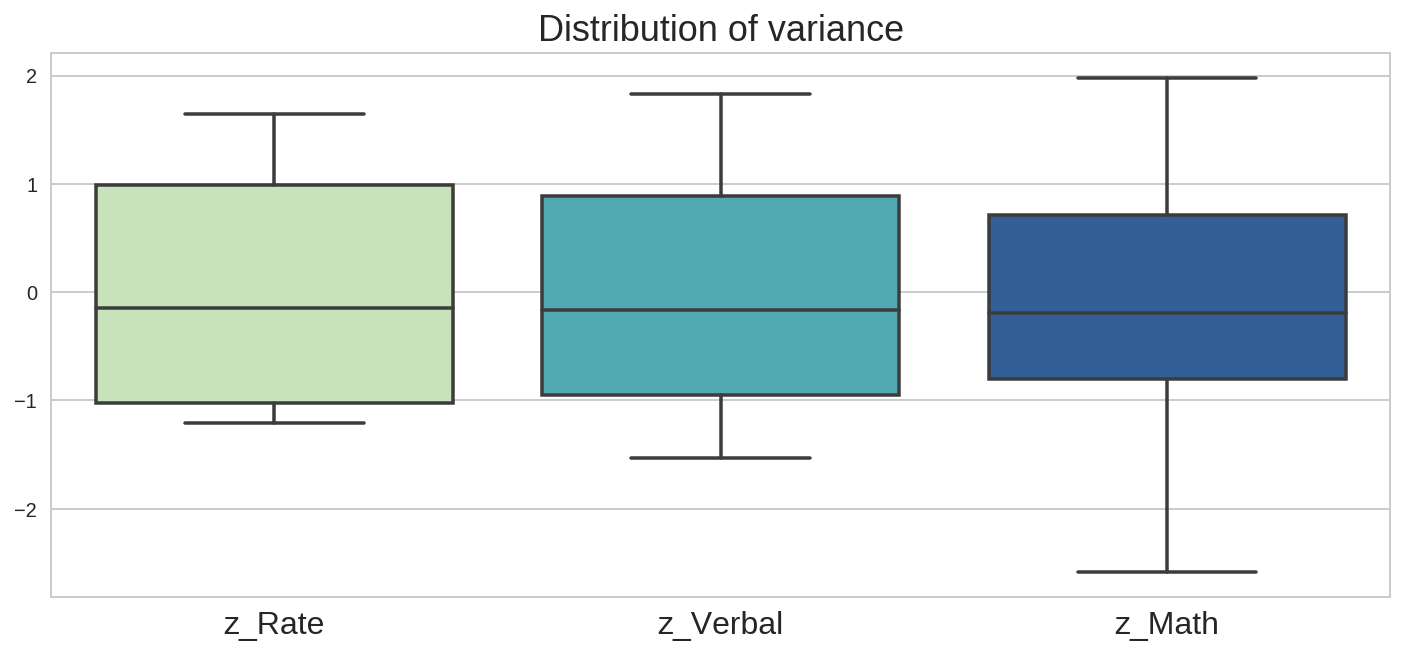

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=z_df, orient='v', palette='YlGnBu')
plt.title('Distribution of variance', fontsize=18)
plt.xticks(fontsize=16);

## Create and examine subsets of the data

### Find the states that have *Verbal* scores greater than the average

In [94]:
# Calculate the mean verbal score
verb_mean = int(sat_scores_df[['Verbal']].mean())

# Find what states are above the mean
state_mean = sat_scores_df[sat_scores_df['Verbal'] > verb_mean]['State']
state_count = state_mean.count()

print ('The mean Verbal score was {}'.format(verb_mean))
print ('-' *80)
print ('{} states were above the mean Verbal score'.format(state_count))
print ('-' *80)
greater_mean_states = [('{}'.format(state)) for state in state_mean]
print ('The following states had verbal scores above the mean: ')
for idx, x in enumerate(greater_mean_states):
    if idx < len(greater_mean_states)-1:
        print ('{},'.format(x)),
    else:
        print ('{}'.format(x))
print ('-'*80)
total_states = sat_scores_df['State'].count()
print ('{} states were below the mean Verbal score'.format(total_states-state_count))
print ('-' *80)
# More states were below the mean than under but not by much. The distribution is pretty normal.

The mean Verbal score was 532
--------------------------------------------------------------------------------
24 states were above the mean Verbal score
--------------------------------------------------------------------------------
The following states had verbal scores above the mean: 
CO, OH, MT, ID, TN, NM, IL, KY, WY, MI, MN, KS, AL, NE, OK, MO, LA, WI, AR, UT, IA, SD, ND, MS
--------------------------------------------------------------------------------
27 states were below the mean Verbal score
--------------------------------------------------------------------------------


**What does this tell you about the distribution of Verbal scores?**

> The distribution of verbal scores are relatively even with almost half of the scores above and below the mean score

### Find the states that have *Verbal* scores greater than the median 

In [122]:
# Calculate the median verbal score
verb_median = int(sat_scores_df[['Verbal']].median())

# Find what states are above the median
above_median = sat_scores_df[sat_scores_df['Verbal'] > verb_median]['State']
below_median = sat_scores_df[sat_scores_df['Verbal'] < verb_median]['State']
equal_median = sat_scores_df[sat_scores_df['Verbal'] == verb_median]['State']

print ('The median Verbal score was {}'.format(verb_median))
print ('-'*80)
print ('{} states were above the median score'.format(above_median.count()))
print ('-'*80)

greater_median_states = [('{}'.format(state)) for state in state_median]
print ('The following states had verbal scores above the median: ')
for idx, x in enumerate(greater_median_states):
    if idx < len(greater_median_states)-1:
        print ('{},'.format(x)),
    else:
        print ('{}'.format(x))
print ('-'*80)
print ('{} states were below the median score'.format(below_median.count()))
print ('-'*80)
print ('{} states were equal to the median score'.format(equal_median.count()))
print ('-'*80)

The median Verbal score was 527
--------------------------------------------------------------------------------
24 states were above the median score
--------------------------------------------------------------------------------
The following states had verbal scores above the median: 
CT, NJ, MA, NY, NH, RI, PA, VT, ME, VA, DE, MD, NC, GA, IN, SC, DC, OR, FL, TX, HI, AK, CA, AZ, NV
--------------------------------------------------------------------------------
25 states were below the median score
--------------------------------------------------------------------------------
2 states were equal to the median score
--------------------------------------------------------------------------------


**How does this compare to the list of states greater than the mean of `Verbal` scores? Why?**

> The number of states above the mean score is similar to the number of states above the median score.  This demonstrates that the distribution is normal.

### Create a column that is the difference between the *Verbal* and *Math* scores

In [124]:
sat_scores_df['Verbal - Math'] = sat_scores_df['Verbal'] - sat_scores_df['Math']
sat_scores_df.head(1)

State  Rate  Verbal  Math  Verbal - Math
0    CT    82     509   510             -1

### Create a DataFrame with top 10 states with the greatest difference between *Verbal* and *Math*

In [22]:
# States where Verbal scores were greater than Maths scores
greater_verb_df = sat_scores_df.sort_values('Verbal - Math',ascending=False).head(10)
greater_verb_df.head(3)

State  Verbal - Math
27    OH             95
50    MS             15
29    WV             15

### Create a DataFrames showing states with the greatest difference between *Math* and *Verbal*

In [23]:
# States where Maths scores were greater than Verbal scores
greater_math_df = sat_scores_df.sort_values('Verbal - Math').head(10)
greater_math_df.head(3)

State  Verbal - Math
21    HI            -30
23    CA            -19
1     NJ            -14

## Summary statistics

### Create correlation matrix for variables

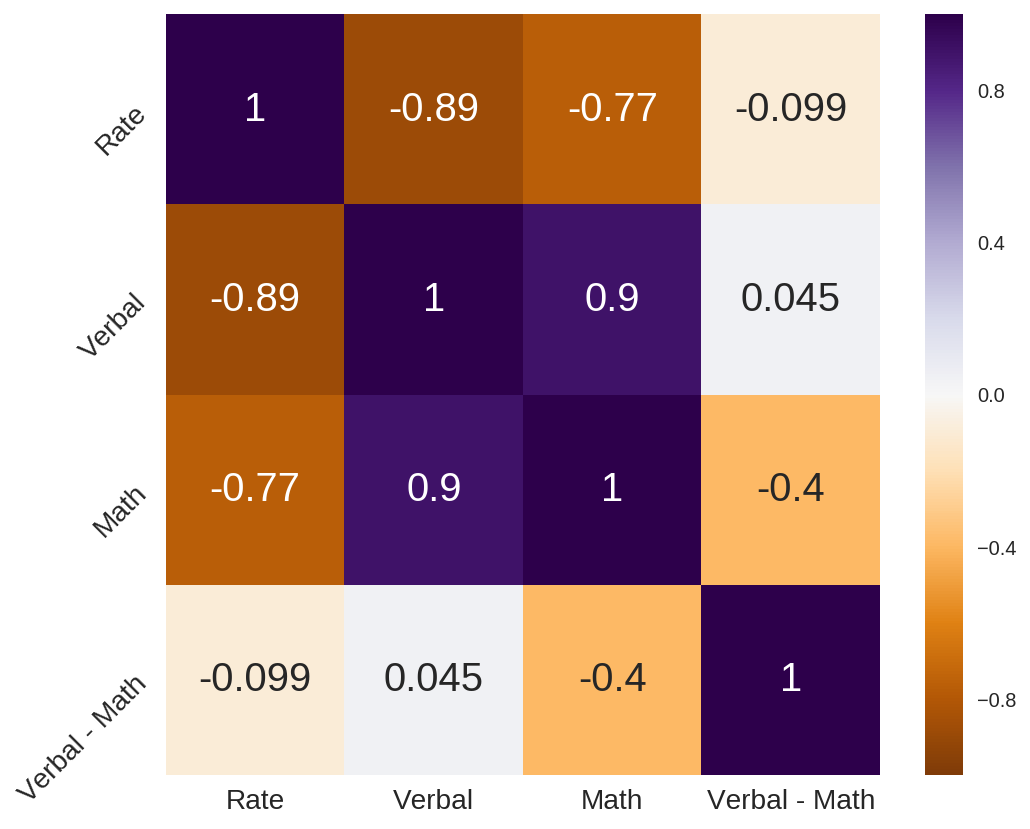

In [147]:
corr = sat_scores_df.corr(method='pearson')
fig,ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, annot=True,annot_kws={"size": 20}, cmap='PuOr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=45);

**What does the correlation matrix tell you?**
>There is a strong negative correlation between state rating and verbal scores 
and between state rating and math scores. 
As the state rating increases math and verbal scores decrease.

>In addition , there is a strong positive correlation between Math and Verbal scores. 
Generally, if a state's math score is high then their verbal score will also be high.  

### Describe your DataFrame

In [25]:
sat_scores_df.describe()

Rate      Verbal        Math  Verbal - Math
count  51.000000   51.000000   51.000000      51.000000
mean   37.000000  532.529412  531.843137       0.686275
std    27.550681   33.360667   36.287393      15.839811
min     4.000000  482.000000  439.000000     -30.000000
25%     9.000000  501.000000  503.000000      -6.000000
50%    33.000000  527.000000  525.000000       0.000000
75%    64.000000  562.000000  557.500000       4.500000
max    82.000000  593.000000  603.000000      95.000000

**Write up what each of the rows returned by the function indicate.**
>Count - There are 52 items in each column

>Mean - This is the mean score for each item

>std - This is the standard deviation for each item

>min - The minimum value for the column

>25% - the first percentile

>50% - the second percentile or median

>75% - the third quartile

>max - The highest value in the column

### Create a covariance matrix for the dataset

Rate       Verbal         Math  Verbal - Math
Rate           759.04  -816.280000  -773.220000     -43.060000
Verbal        -816.28  1112.934118  1089.404706      23.529412
Math          -773.22  1089.404706  1316.774902    -227.370196
Verbal - Math  -43.06    23.529412  -227.370196     250.899608

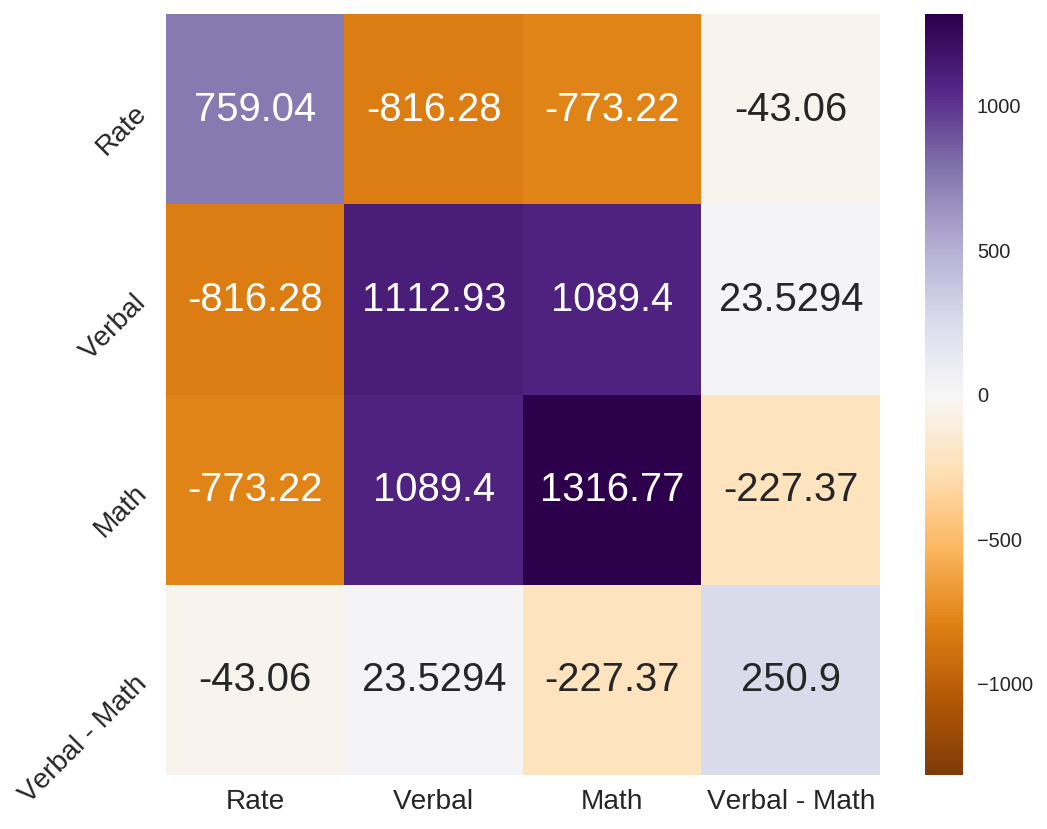

In [153]:
covariance = sat_scores_df.cov()

fig,ax = plt.subplots(figsize=(8,7))
sns.heatmap(covariance, annot=True, cmap='PuOr', fmt='g',annot_kws={"size": 20})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=45);

**1. Describe how the covariance matrix is different from the correlation matrix.**
>The covariance matix provides the covariance between all the variables in the matrix
while the correlation matrix provides the correlation coefficients of all variables. 

**2. What is the process to convert the covariance into the correlation?**
>The covariance is standardised into the correlation coefficent by dividing the covariance by the
standard deviation of both variables.

**3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?**
>The covariance of two variables indicates their correlation but the value is expressed in the variable's
units so it is not as easy to interpret how strong a relationship may be.  

## Performing EDA on "drug use by age" dataset

### Load dataset

sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age

In [208]:
drug_df = pd.read_csv("drug-use-by-age.csv")

In [209]:
## Clean data
drug_df = drug_df.replace('-', np.nan)

### Do a high-level, initial overview of the data

In [210]:
drug_df

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0               NaN        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0              NaN        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2              NaN        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16             NaN        ...                    0.0                 NaN   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [211]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [212]:
## Clean Data
nan_vars = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency'] 
for var in nan_vars: 
    drug_df[var] = pd.to_numeric(drug_df[var], errors='coerce')

In [213]:
## Create a dataframe with only 'use' information 
col_names = drug_df.columns
use_cols = [col for col in col_names if '-use' in col]

## Add age to df
use_cols.append('age')

use_df = pd.DataFrame()
for col in use_cols:
    use_df[col] = drug_df.loc[:,col] 

## Set index to age
use_df.set_index('age', inplace=True)

In [214]:
use_df.describe()


alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
count    17.000000      17.000000    17.000000  17.000000   17.000000   
mean     55.429412      18.923529     2.176471   0.294118    0.352941   
std      26.878866      11.959752     1.816772   0.235772    0.333762   
min       3.900000       1.100000     0.000000   0.000000    0.000000   
25%      40.100000       8.700000     0.500000   0.000000    0.100000   
50%      64.600000      20.800000     2.000000   0.400000    0.200000   
75%      77.500000      28.400000     4.000000   0.500000    0.600000   
max      84.200000      34.000000     4.900000   0.600000    1.100000   

       hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
count         17.000000     17.000000          17.000000      17.000000   
mean           3.394118      1.388235           6.270588       0.935294   
std            2.792506      0.927283           3.166379       0.608216   
min            0.100000      0.000000           0.600000       0.000000   
25%            0.600000      0.600000           3.900000       0.400000   
50%            3.200000      1.400000           6.200000       1.100000   
75%            5.200000      2.000000           9.000000       1.400000   
max            8.600000      3.000000          10.000000       1.700000   

       tranquilizer-use  stimulant-use   meth-use  sedative-use  
count         17.000000      17.000000  17.000000     17.000000  
mean           2.805882       1.917647   0.382353      0.282353  
std            1.753379       1.407673   0.262762      0.138000  
min            0.200000       0.000000   0.000000      0.000000  
25%            1.400000       0.600000   0.200000      0.200000  
50%            3.500000       1.800000   0.400000      0.300000  
75%            4.200000       3.000000   0.600000      0.400000  
max            5.400000       4.100000   0.900000      0.500000

**Initial evaluation**
> On average across all age groups, alcohol was used by the highest amount of people  
marijuana second, pain-releivers 3rd
sedatives, meth, heroin and crack had the least amount of people using them on average

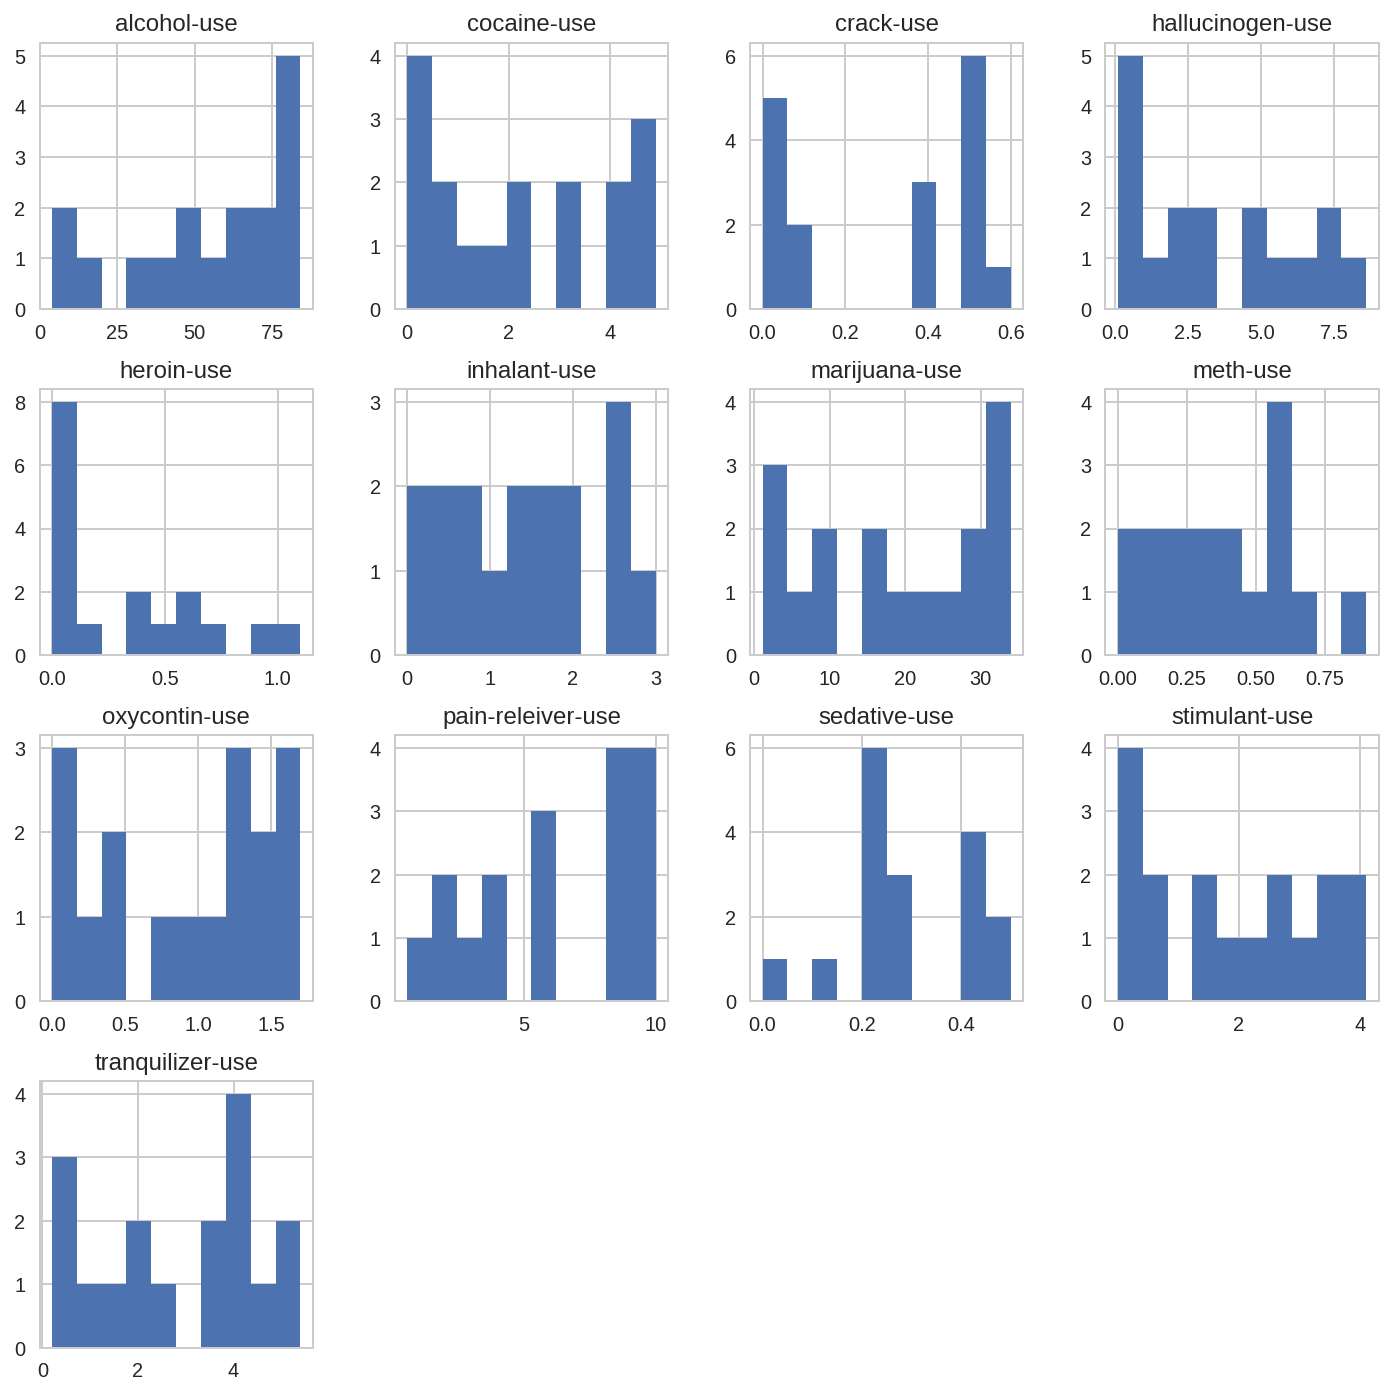

In [215]:
use_df.hist(figsize=(12,12));

**Evaluation of distributions**
>Most variables have a non-normal distribution - likely due to the limited amout of data in the set

>It would be preferable to have more data to be able to make accurate evaluations. However, we can use that data at hand to make initial summary and recommendations

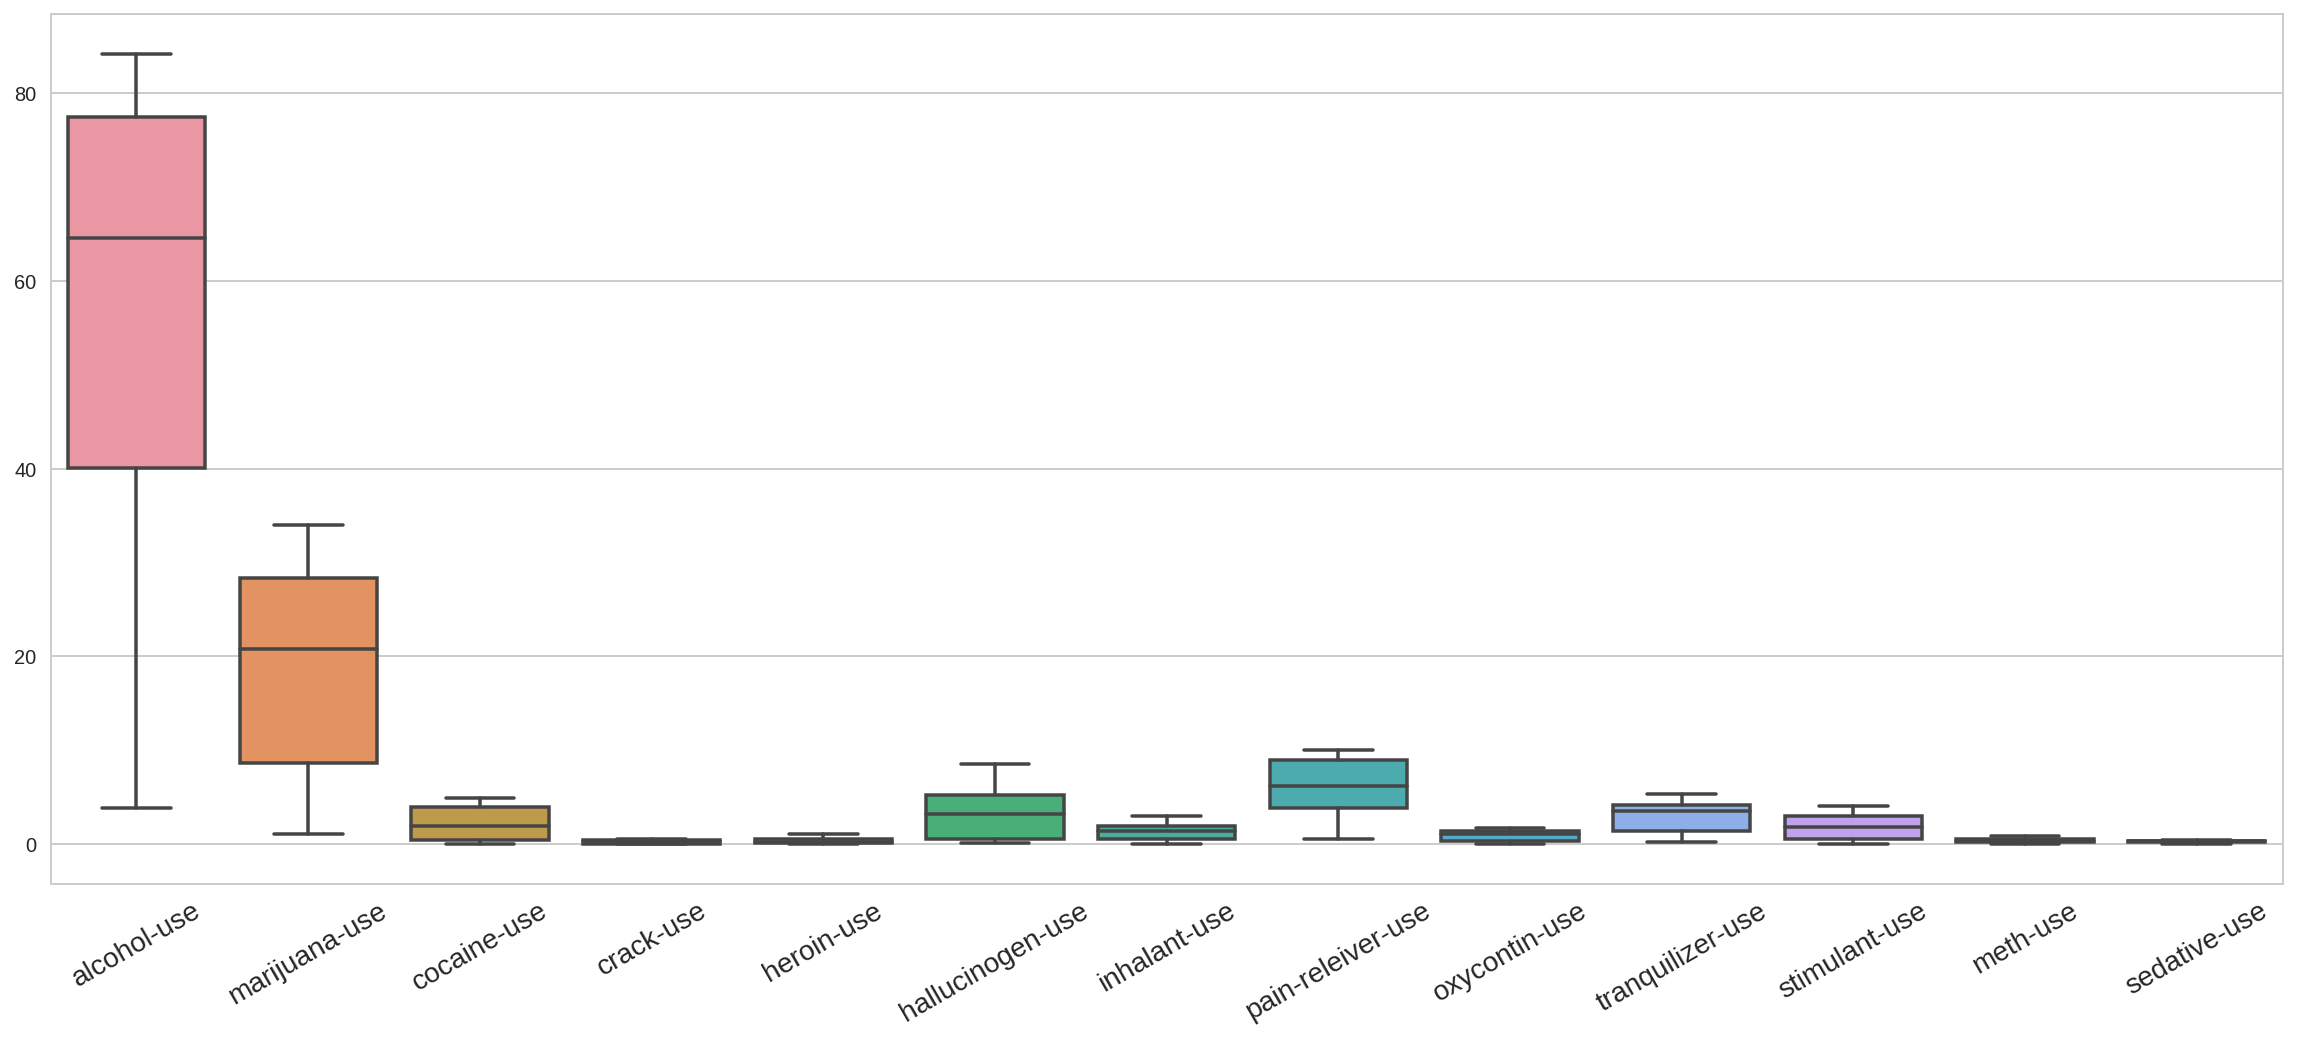

In [216]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(use_df, orient='v',)
plt.xticks(fontsize=14, rotation=30);

** Boxplot evaluation**
>The median for alcohol use was higher than any other substance. This shows that the amount of alcohol consumed was greater than any other drug by participants. 

>Marijuana is the second most used substance on average

>Other substances were not used as often 

In [217]:
## Calculate zscore for each column
use_z_df = pd.DataFrame(use_df)

# Iterate through each column, calculate z-score
# remove old column from df after calculation
for col in use_z_df.columns:
    name = 'z_'+col
    use_z_df[name] = (use_z_df[col] - use_z_df[col].mean())/use_z_df[col].std(ddof=0)
    use_z_df = use_z_df.drop(col, axis=1)

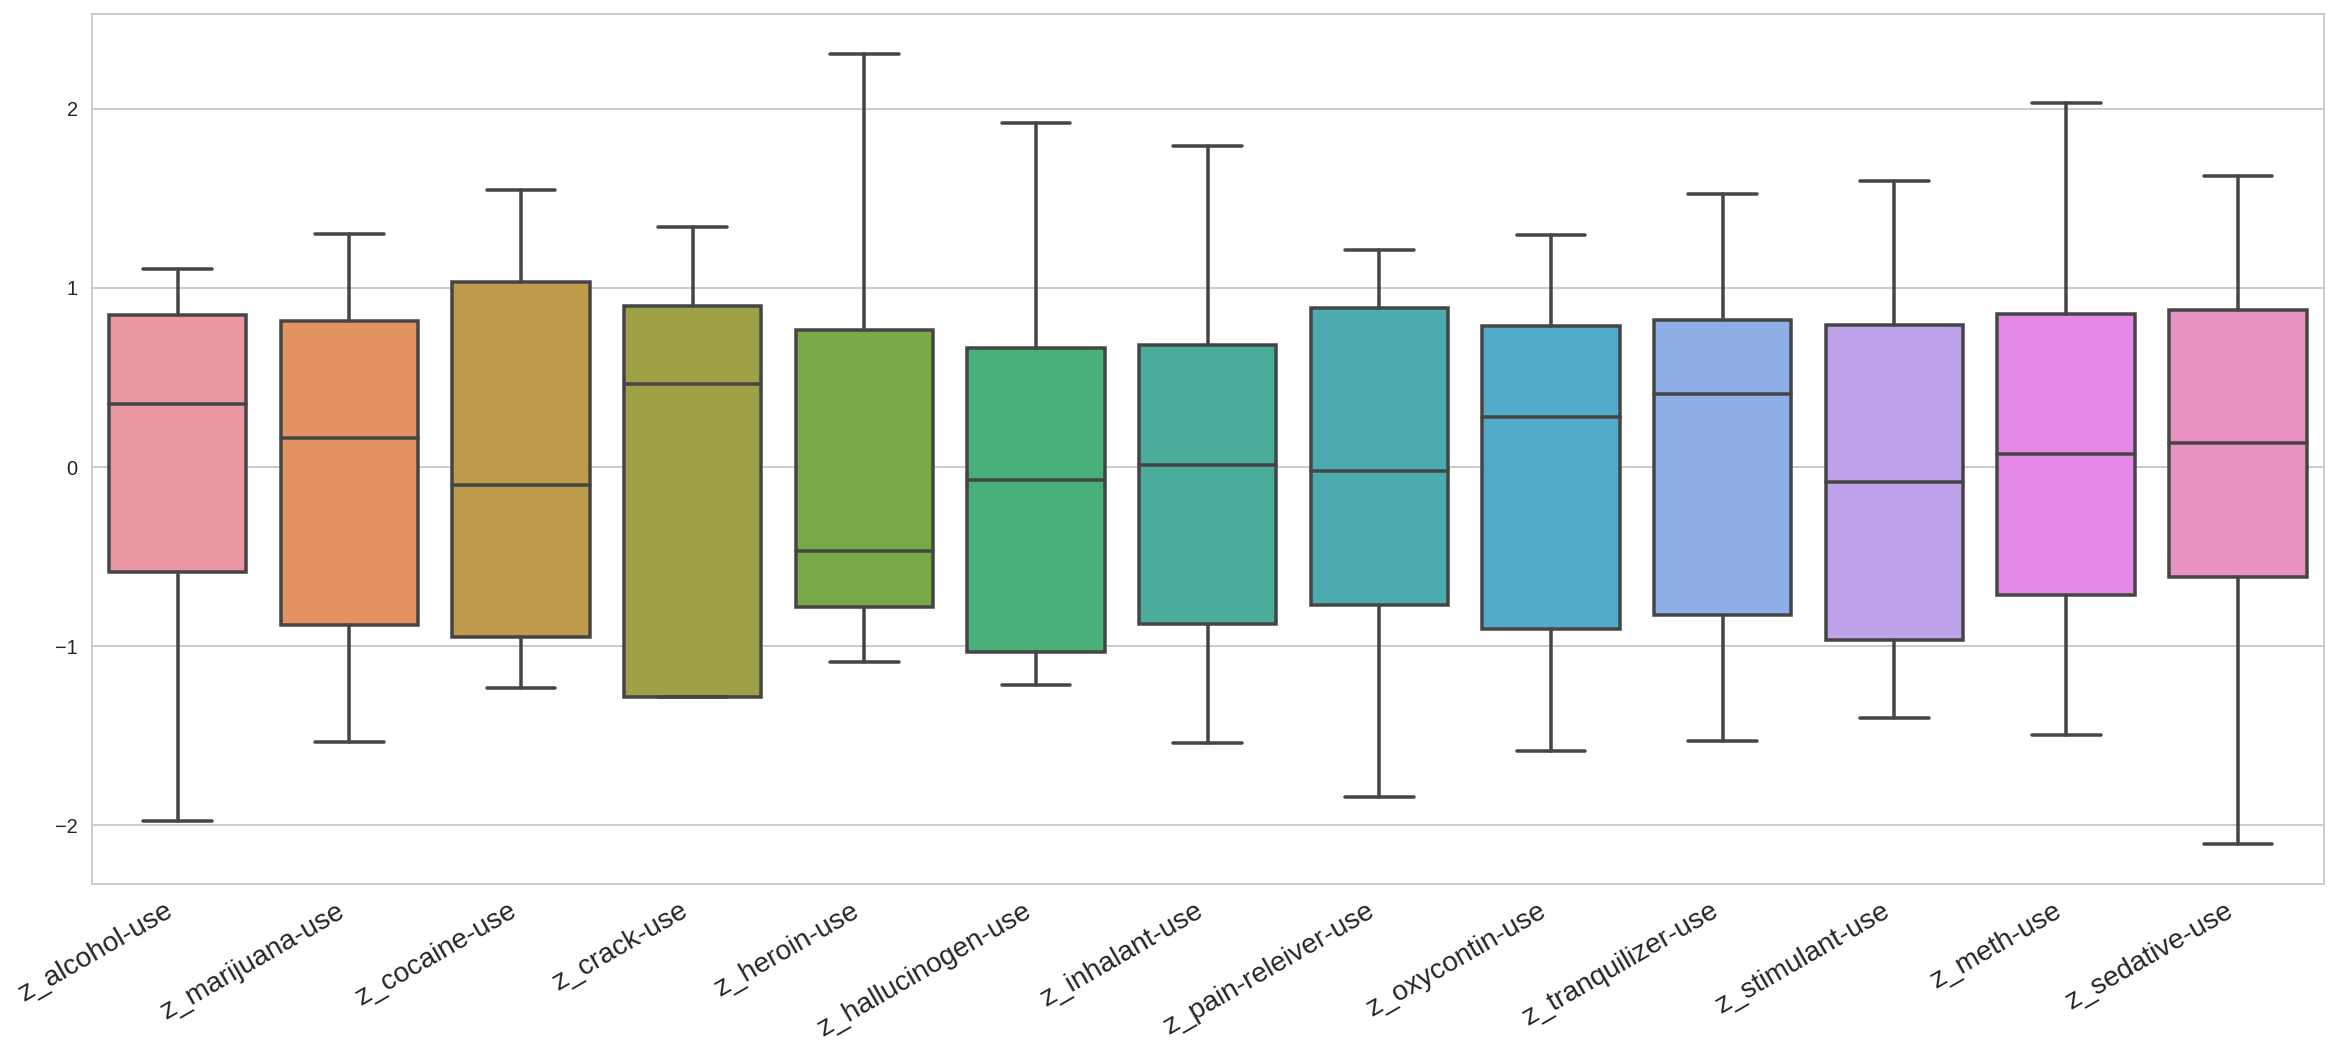

In [218]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(use_z_df, orient='v',)
plt.xticks(fontsize=14, rotation=30, ha='right', va='top');

**Evaluation of variation from mean**
> This boxplot shows the distribution of drug use by age groups in relation to the variation from the mean with 0 representing the mean and 1 representing one standard deviation from the mean. In a normal distribution, one standard deviation plus or minus the mean average is where 68% of the data will be.   

> The coloured areas of the box plot represent the data between the 25th and 75th percentiles, or 50% of the data. We can see that for all the categories of drug use, except crack, this box fits between -1 and 1. This means that at least 50% of the data is within 1 standard deviation from the mean. 

> The line in the middle of each box represents the median. The median is the halfway point for the data. Half of all the data will lie on one side of the median and the other half will be on the other side. Knowing this, we can see that alcohol, crack, heroin, oxycotin and tranquilizer use use have skewed distributions from the centre. 
Of these five drugs, four have a median average use that is greater than the mean. Heroin use has a median average that is less than the mean.

> The range of variation was greatest for heroin and sedative use. However, none of the categories of drug use extend beyond 2.5 standard deviations which is where we would expect a normal distribution to be. 

In [219]:
# Create a dataframe with only drug frequency information 

freq_cols = [col for col in col_names if 'freq' in col]
freq_cols.append('age')

freq_df = pd.DataFrame()
for col in freq_cols:
    freq_df[col] = drug_df.loc[:,col] 
freq_df.set_index('age', inplace=True)


In [220]:
freq_df.describe()

alcohol-frequency  marijuana-frequency  cocaine-frequency  \
count          17.000000            17.000000          16.000000   
mean           33.352941            42.941176           7.875000   
std            21.318833            18.362566           8.038449   
min             3.000000             4.000000           1.000000   
25%            10.000000            30.000000           5.000000   
50%            48.000000            52.000000           5.250000   
75%            52.000000            52.000000           7.250000   
max            52.000000            72.000000          36.000000   

       crack-frequency  heroin-frequency  hallucinogen-frequency  \
count        14.000000         16.000000               17.000000   
mean         15.035714         73.281250                8.411765   
std          18.111263         70.090173               15.000245   
min           1.000000          1.000000                2.000000   
25%           5.000000         39.625000                3.000000   
50%           7.750000         53.750000                3.000000   
75%          16.500000         71.875000                4.000000   
max          62.000000        280.000000               52.000000   

       inhalant-frequency  pain-releiver-frequency  oxycontin-frequency  \
count           16.000000                17.000000            16.000000   
mean             6.156250                14.705882            14.812500   
std              4.860448                 6.935098            12.798275   
min              2.000000                 7.000000             3.000000   
25%              3.375000                12.000000             5.750000   
50%              4.000000                12.000000            12.000000   
75%              6.625000                15.000000            18.125000   
max             19.000000                36.000000            46.000000   

       tranquilizer-frequency  stimulant-frequency  meth-frequency  \
count               17.000000            17.000000       15.000000   
mean                11.735294            31.147059       35.966667   
std                 11.485205            85.973790       31.974581   
min                  4.500000             2.000000        2.000000   
25%                  6.000000             7.000000       12.000000   
50%                 10.000000            10.000000       30.000000   
75%                 11.000000            12.000000       47.000000   
max                 52.000000           364.000000      105.000000   

       sedative-frequency  
count           17.000000  
mean            19.382353  
std             24.833527  
min              3.000000  
25%              6.500000  
50%             10.000000  
75%             17.500000  
max            104.000000

**Initial overview of frequency data**
> This set shows the average number of times a person has used the substance 

>Heroin averaged the highest number of uses on average per user

>marijuana was second and meth third

>inhalants were the least often used by a user 

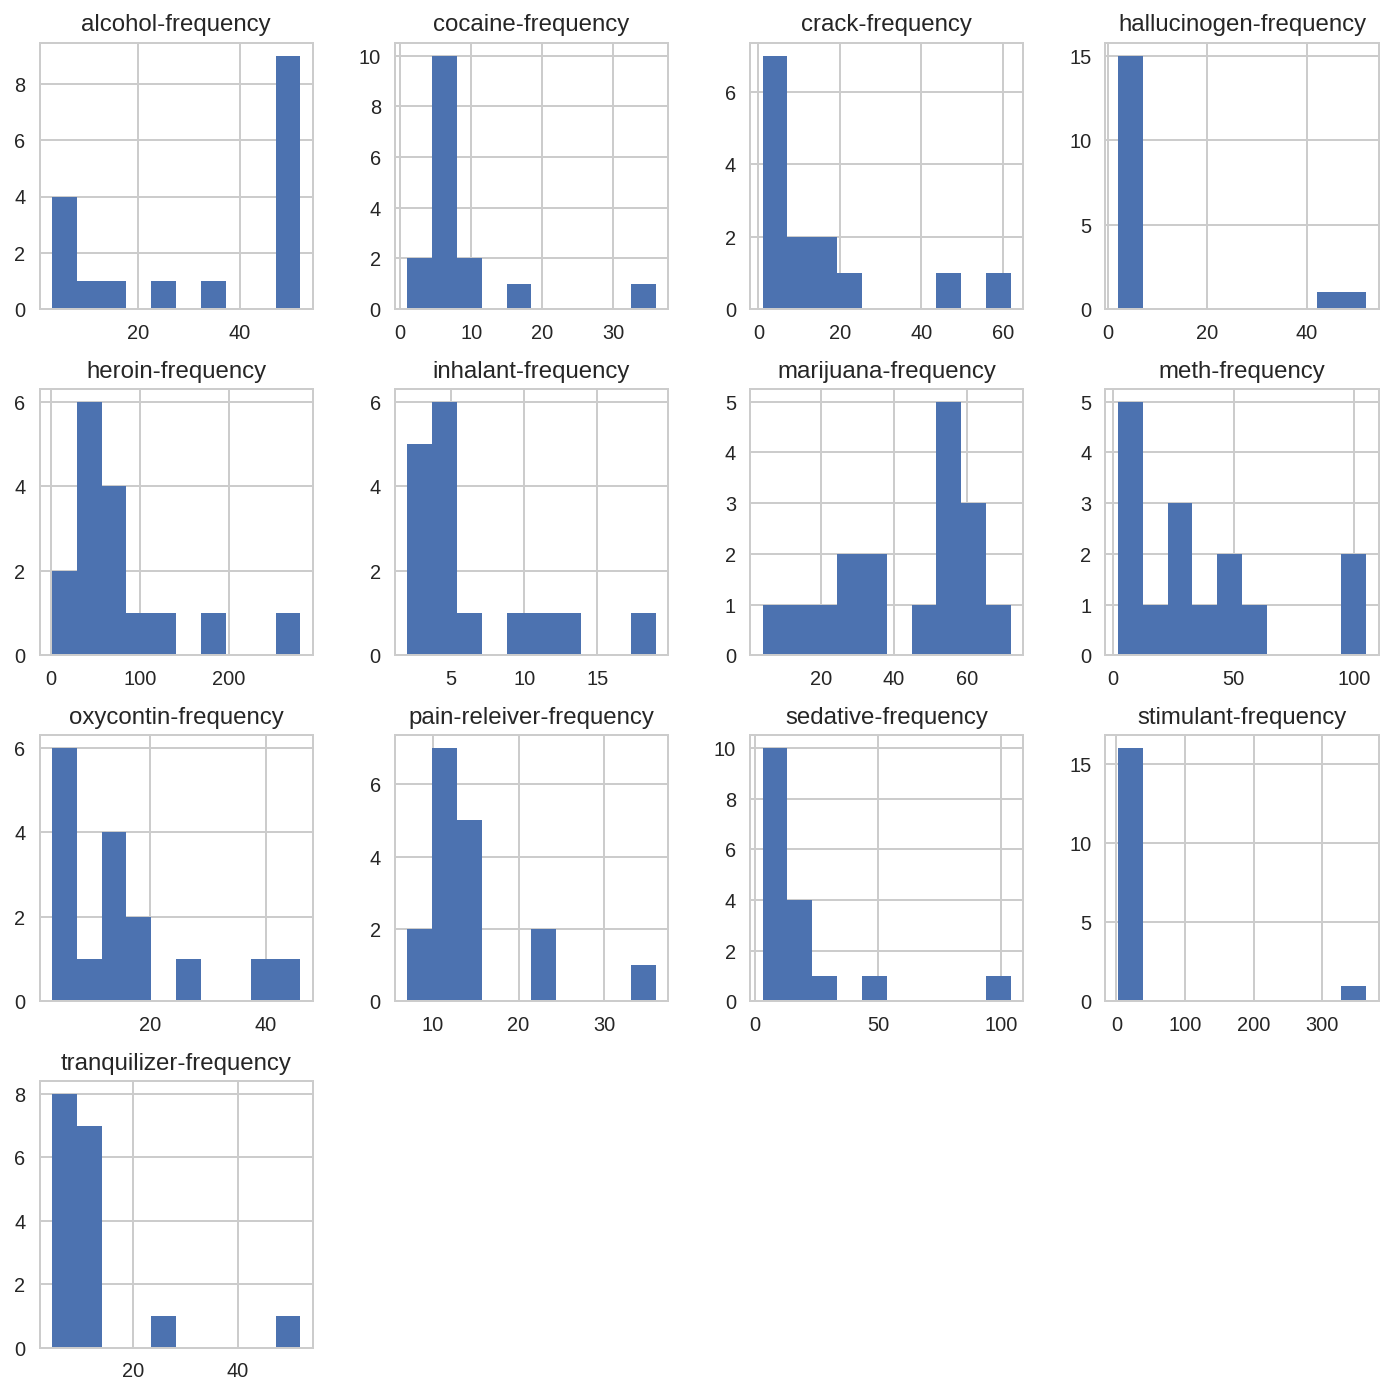

In [221]:
freq_df.hist(figsize=(12,12));

** Evalutation of histogram**
> Again, this shows most categories have a non-normal distribution - likely due to the limited amout of data in the set

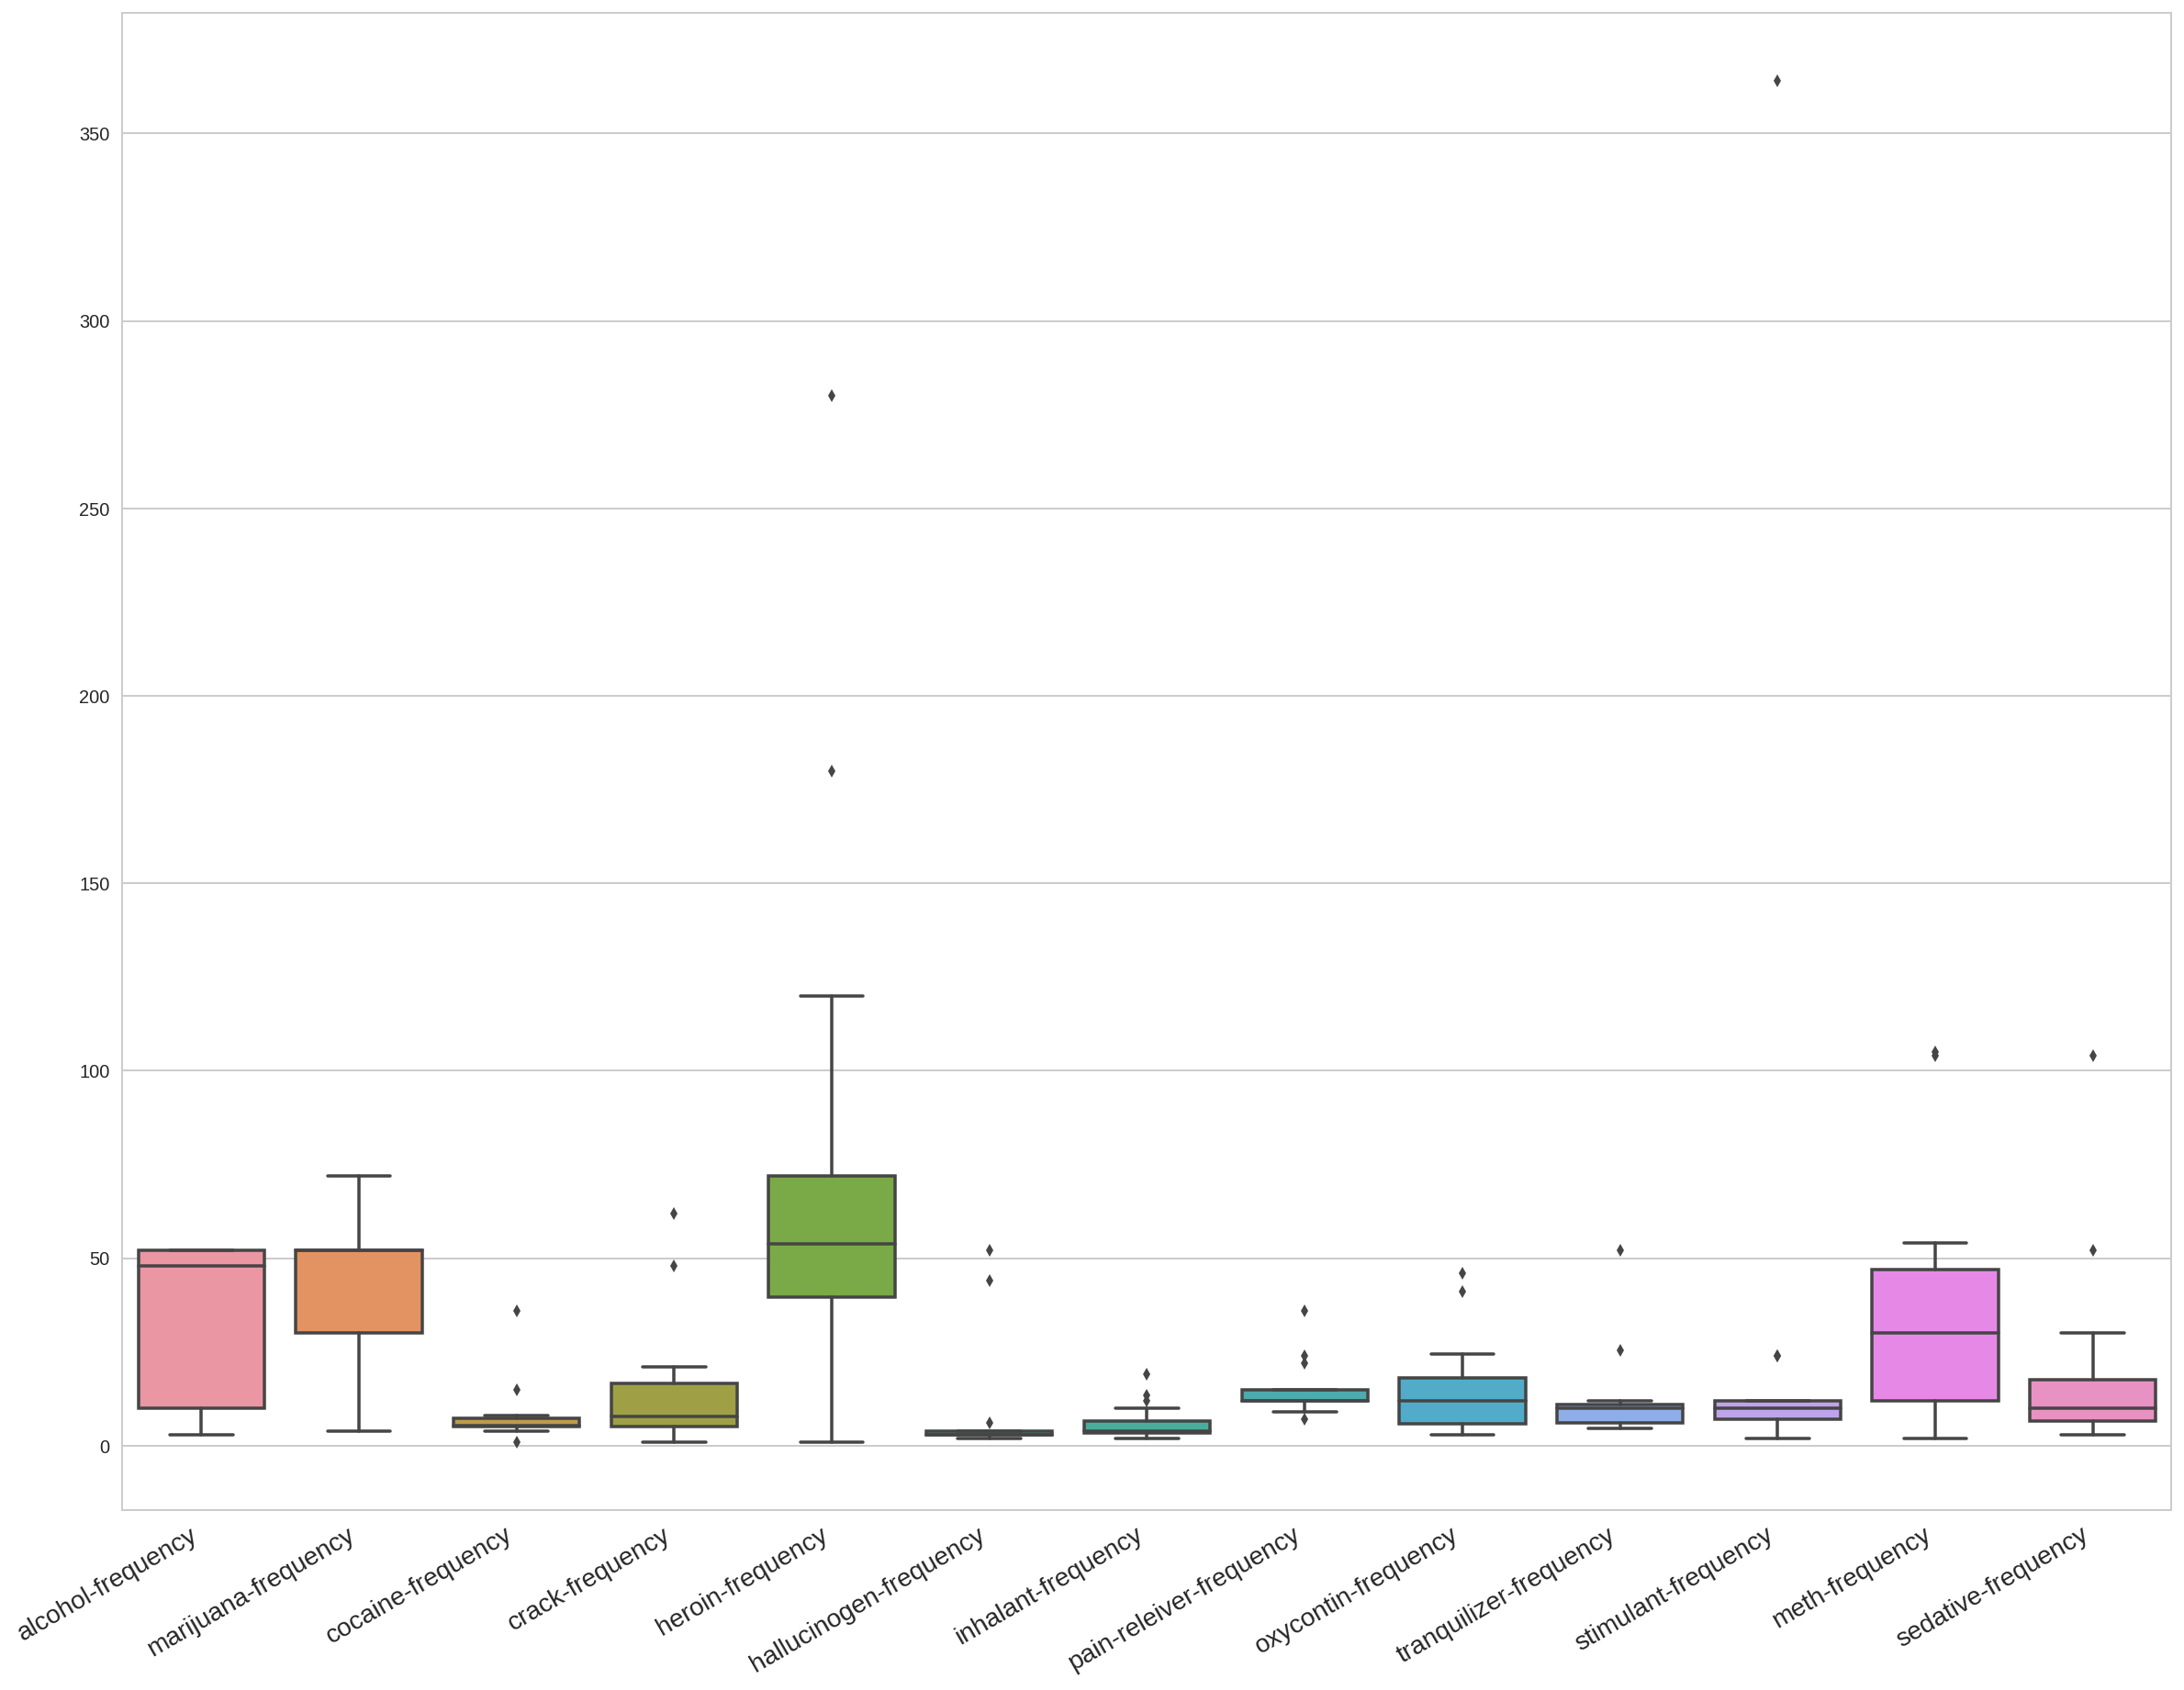

In [222]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(freq_df, orient='v',)
plt.xticks(fontsize=14, rotation=30, ha='right', va='top');

**Boxplot evaluation**
>There are some outliers in this set which make it difficult to evaluate the majority of the data

> Next step is to remove the outliers to get a better understanding of the data

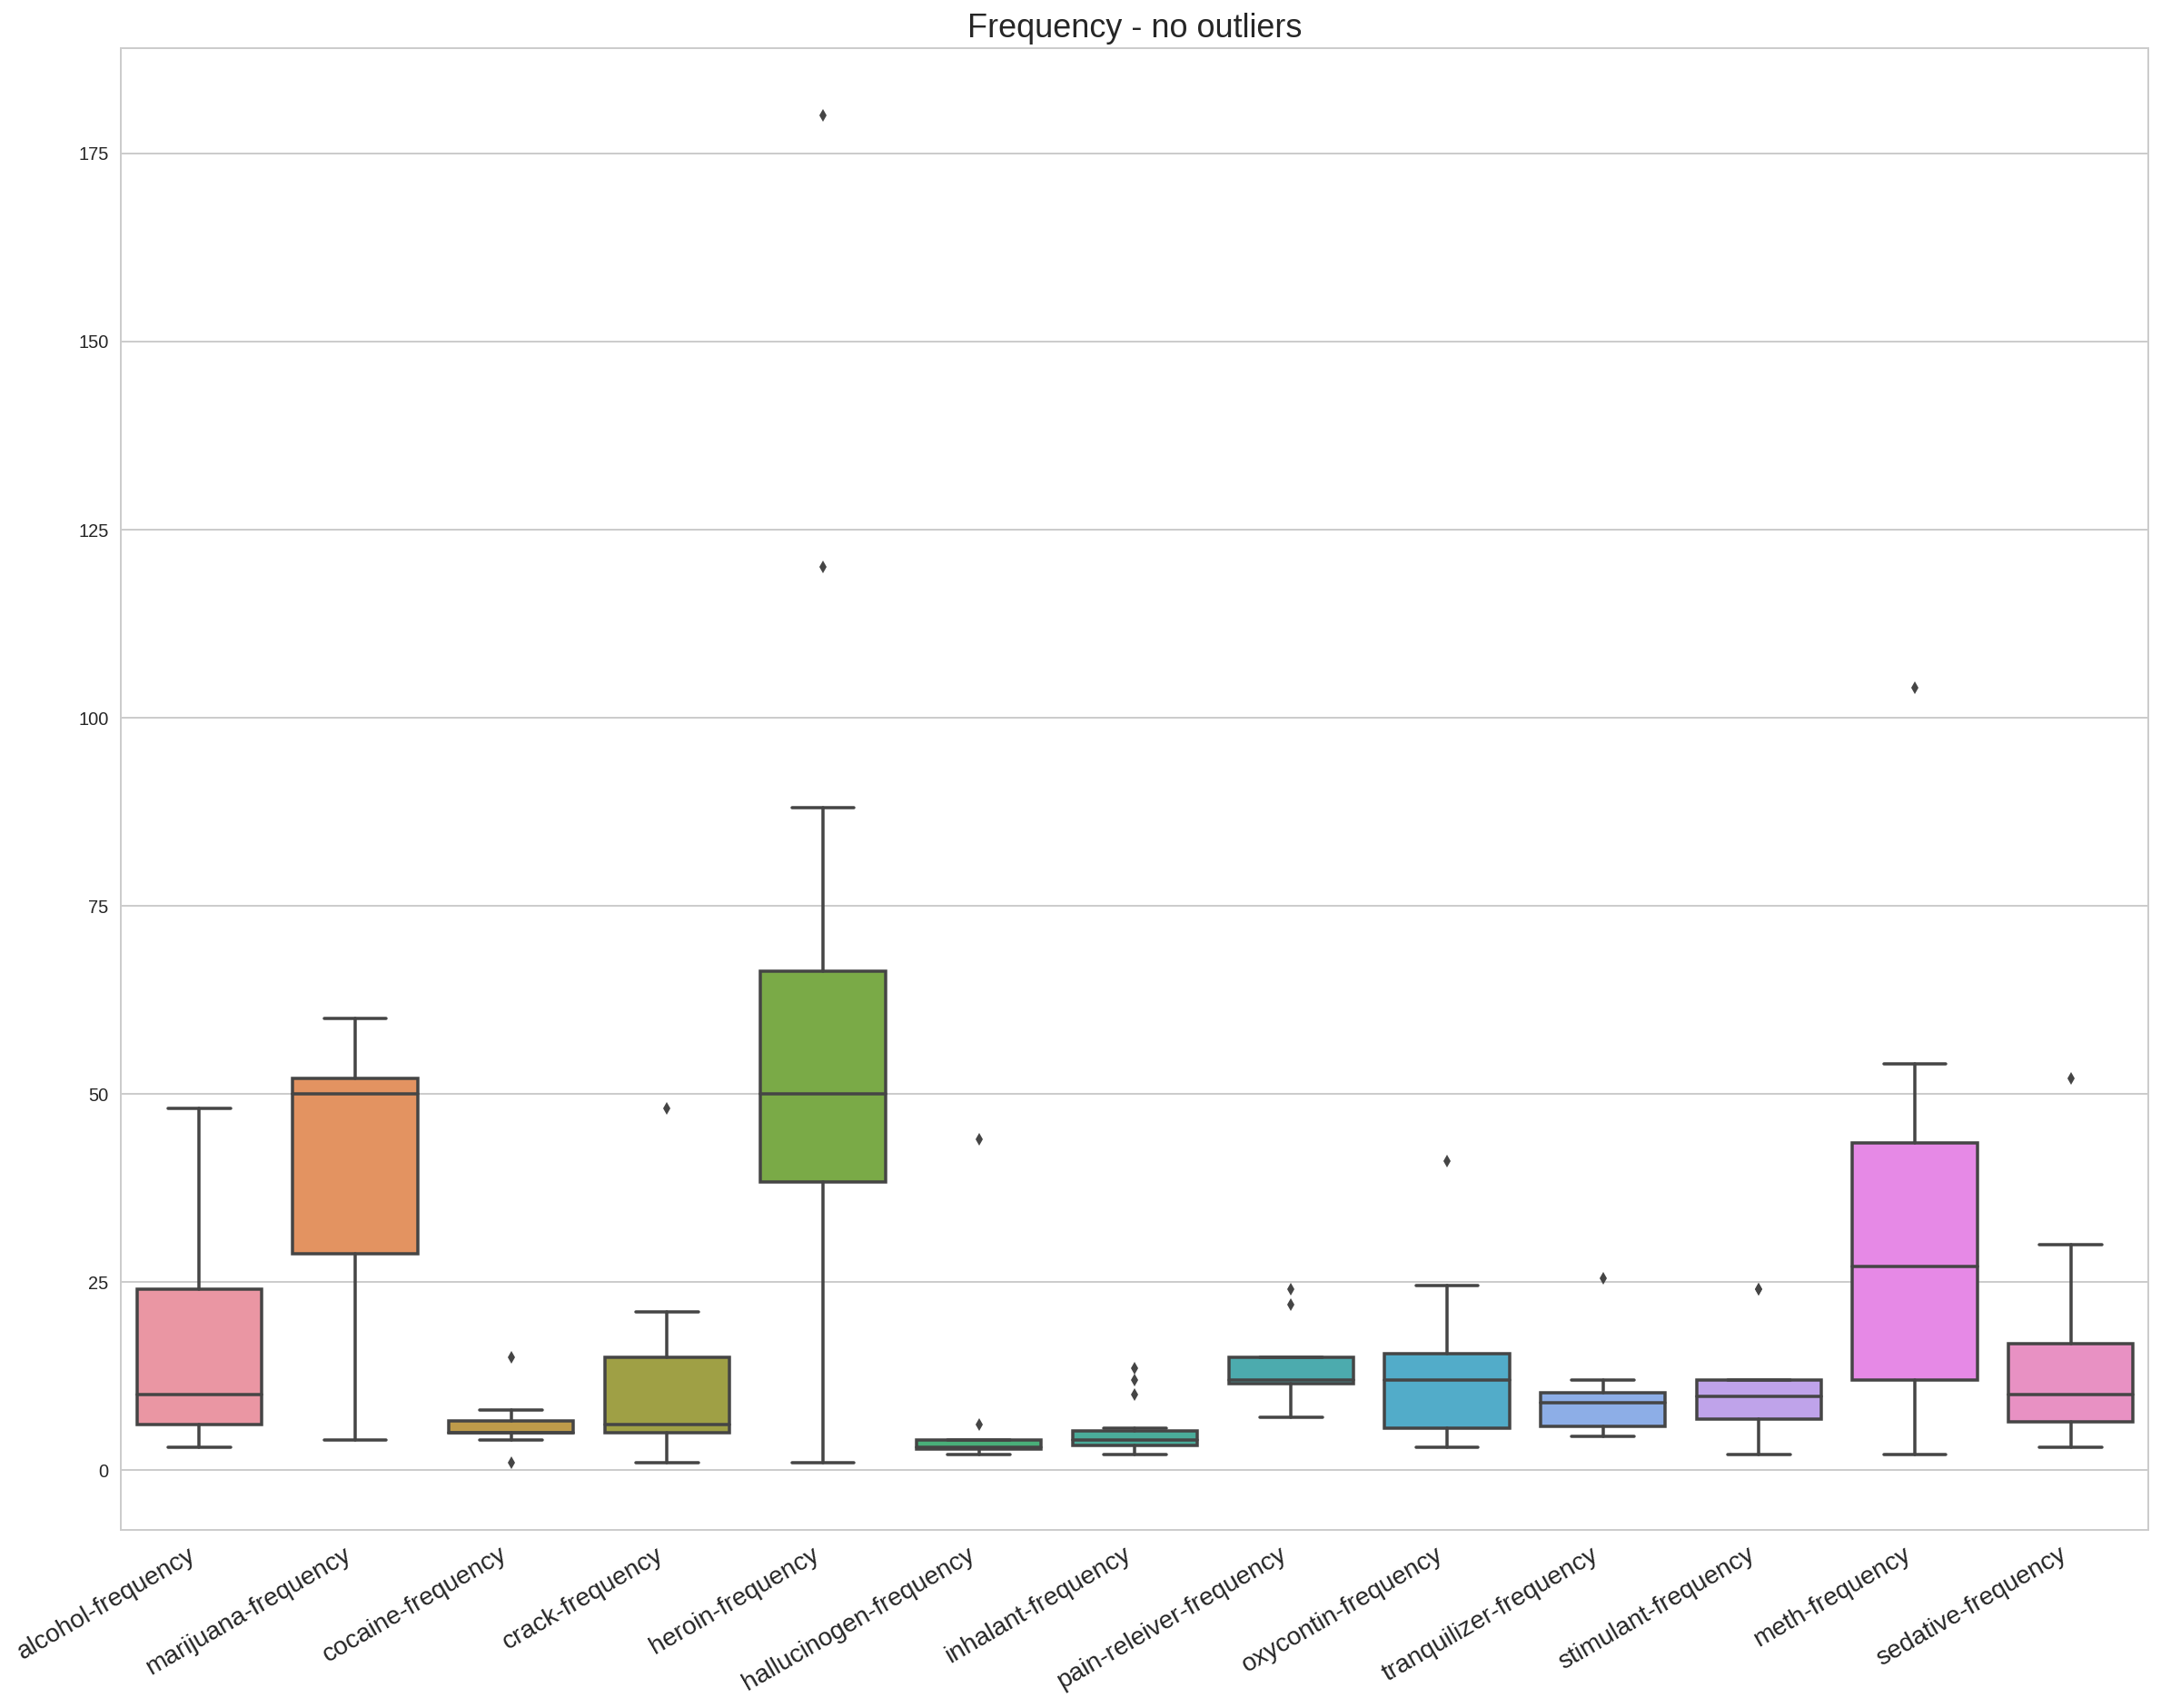

In [223]:
## Check out outliers
no_out_freq = pd.DataFrame(freq_df)
for col in no_out_freq.columns:
    q = no_out_freq[col].quantile(0.99)
    no_out_freq[col] = no_out_freq[col].map(lambda x : x if (x < q) else np.nan)

fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(no_out_freq, orient='v',)
plt.xticks(fontsize=14, rotation=30, ha='right', va='top')
plt.title('Frequency - no outliers', fontsize=18);

** Evaluation of cleaned boxplot**
> With outliers removed we can see more accurately the distribution of all drug frequencies

> The frequency of heroin use is the most varied with a quite high median. This shows us that people that use heroin are doing so more frequently than any other drug. Meth and marijuana frequency follow. 

> Although we previously saw that alcohol had the highest rate for use it is not being used as frequently as some other drugs.  

In [224]:
## Calculate the zscore for each variable in df
freq_z_df = pd.DataFrame(freq_df)

# Iterate through each column, calculate z-score
# remove old column from df after calculation
for col in freq_z_df.columns:
    name = 'z_'+col
    freq_z_df[name] = (freq_z_df[col] - freq_z_df[col].mean())/freq_z_df[col].std(ddof=0)
    freq_z_df = freq_z_df.drop(col, axis=1)
freq_df.columns.drop('z_alcohol-frequency')

Index([u'alcohol-frequency', u'marijuana-frequency', u'cocaine-frequency',
       u'crack-frequency', u'heroin-frequency', u'hallucinogen-frequency',
       u'inhalant-frequency', u'pain-releiver-frequency',
       u'oxycontin-frequency', u'tranquilizer-frequency',
       u'stimulant-frequency', u'meth-frequency', u'sedative-frequency'],
      dtype='object')

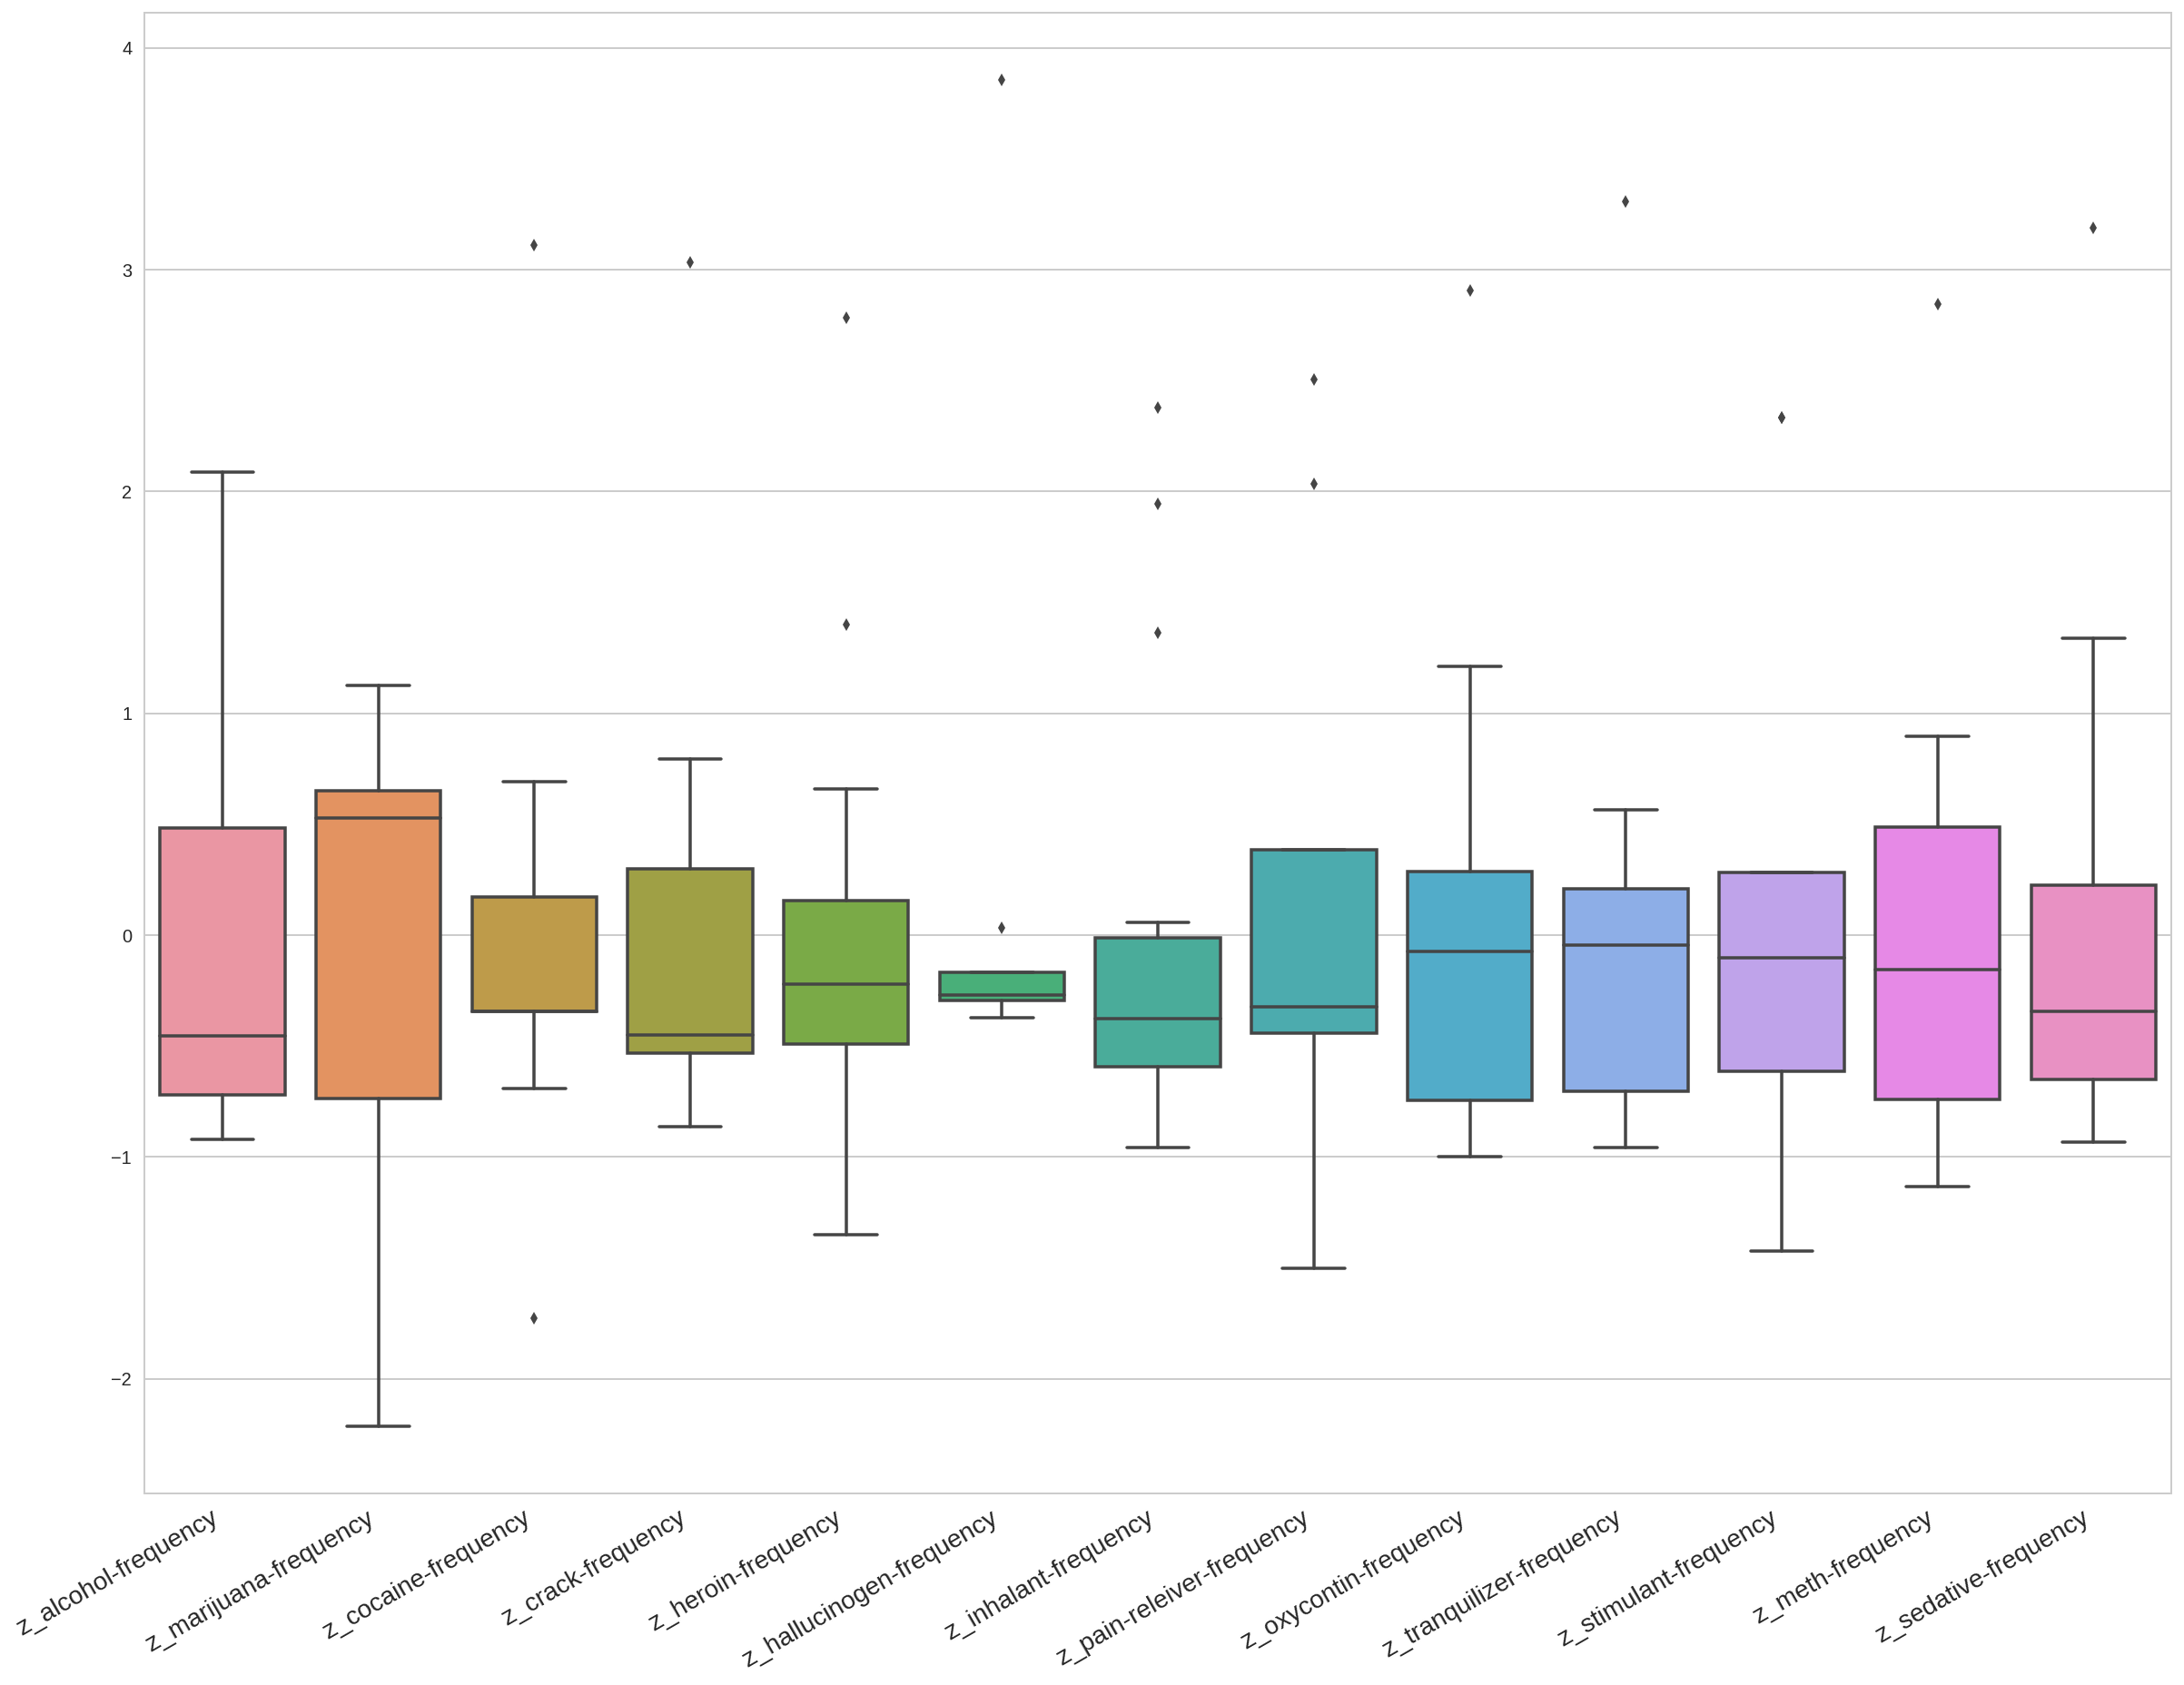

In [227]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(freq_z_df, orient='v',)
plt.xticks(fontsize=14, rotation=30, ha='right', va='top');

**Evaluation of zscore boxplot (includes outliers)**
>Again, the data have been standardised so we can see how much variation there is in the data from the mean. 

>We can quickly see that the median alcohol frequency is quite low which suggests that people are not drinking very often. But when they do drink, they drink a lot (according to our previous evaluations). However, there is a large variation te in data and there would be some people who drink more frequently than others. Yet according the data, the majority of those surveyed are not drinking that frequently. 

>There is a broad distribution for marijuana frequency however, the median is higher than the mean average. This shows that more than 50% of the people surveyed consume marijuana more than the mean average. 

> Besides these two drugs, all other substance frequence lies within 2 standard deviations from the mean, with most between one standard deviation. This demonstrates that most age groups use thes drugs at a similar frequency on average. 

> It would be beneficial to examine whether there is a significant difference in drug frequency between age groups..

In [228]:
## Correlation matrix
drug_df.corr(method='pearson')

n  alcohol-use  alcohol-frequency  \
n                        1.000000     0.310512           0.313431   
alcohol-use              0.310512     1.000000           0.897889   
alcohol-frequency        0.313431     0.897889           1.000000   
marijuana-use           -0.169007     0.594165           0.260219   
marijuana-frequency      0.135597     0.920425           0.818769   
cocaine-use             -0.021565     0.773458           0.577601   
cocaine-frequency        0.365386     0.254042           0.391981   
crack-use                0.281797     0.877378           0.785050   
crack-frequency          0.548114     0.202732           0.333935   
heroin-use               0.007798     0.677614           0.546194   
heroin-frequency         0.615534     0.327330           0.381874   
hallucinogen-use        -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.008743    -0.346643          -0.174622   
inhalant-use            -0.368395    -0.648248          -0.864153   
inhalant-frequency       0.190410    -0.556707          -0.305296   
pain-releiver-use       -0.083587     0.617523           0.280704   
pain-releiver-frequency -0.112076    -0.263721           0.007087   
oxycontin-use           -0.166039     0.589219           0.251554   
oxycontin-frequency     -0.024438    -0.052126           0.119852   
tranquilizer-use        -0.071086     0.735785           0.448543   
tranquilizer-frequency  -0.102301    -0.550501          -0.415026   
stimulant-use           -0.201621     0.582241           0.291766   
stimulant-frequency     -0.114792    -0.028115           0.260304   
meth-use                -0.063571     0.682531           0.425153   
meth-frequency           0.485909     0.282820           0.253725   
sedative-use            -0.119997     0.318268           0.029867   
sedative-frequency       0.256701     0.091251           0.201423   

                         marijuana-use  marijuana-frequency  cocaine-use  \
n                            -0.169007             0.135597    -0.021565   
alcohol-use                   0.594165             0.920425     0.773458   
alcohol-frequency             0.260219             0.818769     0.577601   
marijuana-use                 1.000000             0.615610     0.883789   
marijuana-frequency           0.615610             1.000000     0.742598   
cocaine-use                   0.883789             0.742598     1.000000   
cocaine-frequency            -0.273950             0.250348    -0.163922   
crack-use                     0.620670             0.892077     0.835727   
crack-frequency              -0.476095             0.113860    -0.339153   
heroin-use                    0.711613             0.631789     0.899944   
heroin-frequency             -0.047566             0.277175     0.058679   
hallucinogen-use              0.959353             0.528733     0.855668   
hallucinogen-frequency       -0.478286            -0.380430    -0.368402   
inhalant-use                  0.127336            -0.577792    -0.214609   
inhalant-frequency           -0.799094            -0.598028    -0.636591   
pain-releiver-use             0.966226             0.612254     0.906638   
pain-releiver-frequency      -0.506892            -0.285292    -0.273908   
oxycontin-use                 0.971733             0.609618     0.865626   
oxycontin-frequency          -0.323519             0.040880    -0.075193   
tranquilizer-use              0.935199             0.768339     0.920430   
tranquilizer-frequency       -0.401769            -0.591449    -0.294905   
stimulant-use                 0.968096             0.561246     0.923954   
stimulant-frequency          -0.389145            -0.069454    -0.309286   
meth-use                      0.870446             0.664280     0.889353   
meth-frequency                0.014585             0.317099     0.043154   
sedative-use                  0.616766             0.399124     0.461914   
sedative-frequency           -0.277144         

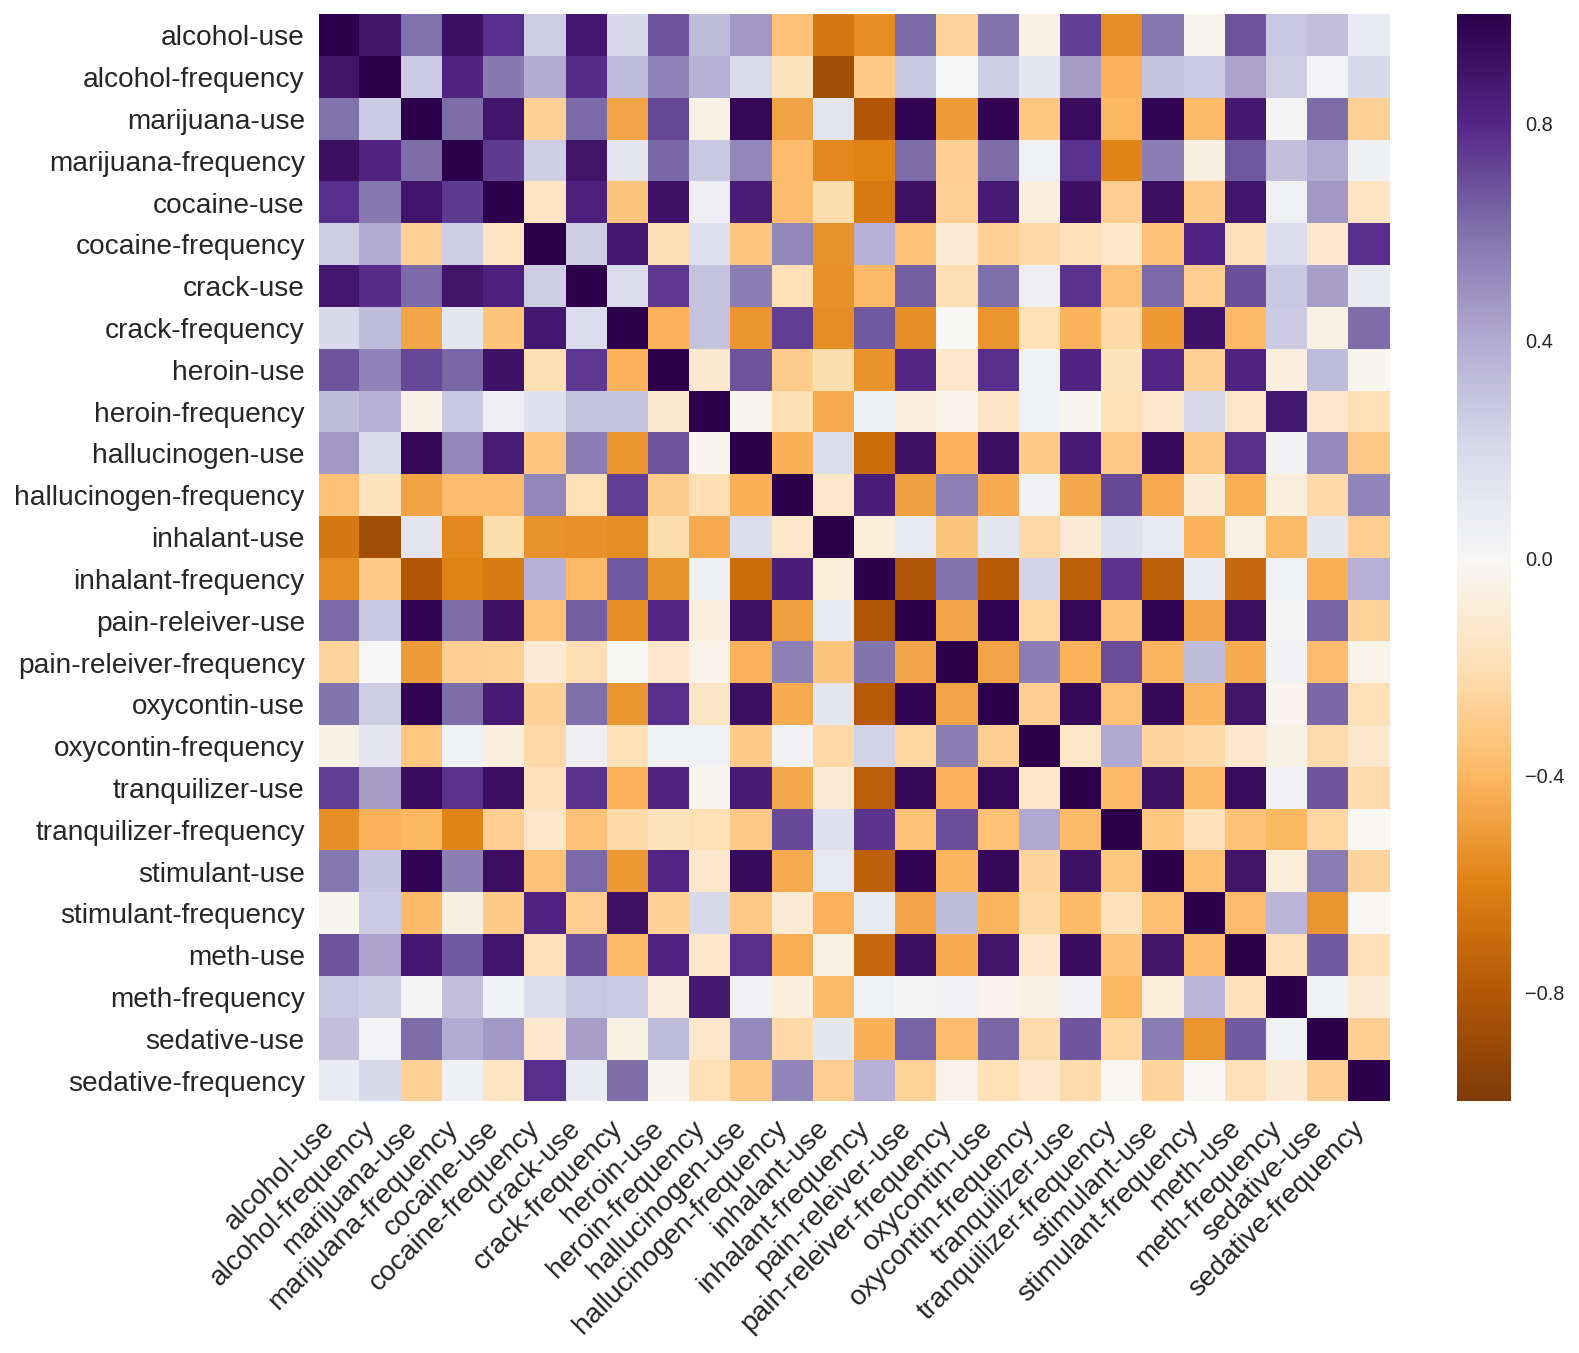

In [232]:
### Correlation between variables based on real variables
drug_df.sort_index(axis=1)
fig, ax = plt.subplots(figsize=(12,10))
corr = drug_df.drop('n',axis=1).corr(method='pearson')
ax = sns.heatmap(corr, cmap="PuOr")

plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14);

In [242]:
drug_z = pd.DataFrame(drug_df)
drug_z = drug_df.drop('age',axis=1)
drug_z = drug_z.drop('n',axis=1)
# drug_z = drug_z.apply(stats.zscore)
for col in drug_z.columns:
    name = 'z_'+col
    drug_z[name] = (drug_z[col] - drug_z[col].mean())/drug_z[col].std(ddof=0)
    drug_z = drug_z.drop(col, axis=1)

In [243]:
drug_z

z_alcohol-use  z_alcohol-frequency  z_marijuana-use  \
0       -1.976099            -1.467580        -1.536158   
1       -1.799694            -1.322529        -1.337928   
2       -1.431544            -1.370879        -0.881136   
3       -1.005871            -1.322529        -0.381251   
4       -0.587867            -1.129127         0.308246   
5       -0.235057            -0.984075         0.782275   
6        0.125424            -0.452219         1.273541   
7        0.351682             0.127987         1.247685   
8        0.547262             0.708193         1.299397   
9        1.064973             0.901595         1.213210   
10       1.103322             0.901595         0.816750   
11       1.061138             0.901595         0.515095   
12       0.969101             0.901595         0.161728   
13       0.846384             0.901595        -0.217496   
14       0.750512             0.901595        -0.734618   
15       0.451390             0.901595        -1.001798   
16      -0.235057             0.901595        -1.527540   

    z_marijuana-frequency  z_cocaine-use  z_cocaine-frequency  z_crack-use  \
0               -2.185950      -1.178121            -0.369386    -1.285861   
1               -1.568468      -1.178121            -0.883313    -1.285861   
2               -1.063257      -1.178121            -0.305145    -1.285861   
3               -1.007122      -0.951174            -0.497868    -0.848668   
4               -0.726449      -0.667490            -0.112422    -1.285861   
5               -0.389641      -0.100124            -0.369386    -0.848668   
6                0.508514       0.580717            -0.369386     0.462910   
7                0.957591       1.091347            -0.305145     0.900103   
8                0.957591       1.545240             0.016060     1.337296   
9                0.508514       1.488504            -0.369386     0.900103   
10               0.508514       1.318294            -0.369386     0.900103   
11               0.957591       1.034610            -0.240904     0.900103   
12               0.508514       0.580717            -0.369386     0.462910   
13               1.631207      -0.043387             0.016060     0.900103   
14               0.283975      -0.383807             0.915434     0.900103   
15               0.508514      -0.724227             3.613555     0.462910   
16              -0.389641      -1.234857                  NaN    -1.285861   

    z_crack-frequency  z_heroin-use  z_heroin-frequency          ...           \
0                 NaN     -0.781173           -0.556716          ...            
1           -0.689629     -1.090009                 NaN          ...            
2                 NaN     -0.781173           -1.050346          ...            
3           -0.317188     -0.472337           -1.065082          ...            
4           -0.804226     -0.781173           -0.099923          ...            
5            0.341745     -0.781173           -0.136761          ...            
6           -0.288539      0.145334           -0.401996          ...            
7           -0.746927      0.454170            1.572526          ...            
8           -0.575032      1.689513           -0.416731          ...            
9            0.112551      0.763006           -0.637760          ...            
10          -0.575032      2.307185           -0.232541          ...            
11          -0.517733      1.071842            0.216884          ...            
12          -0.517733      0.763006           -0.343055          ...            
13          -0.002046      0.145334           -0.107291          ...            
14           1.888806     -0.781173            3.046051          ...            
15           2.690985     -0.781173           -0.475672          ...            
16                NaN     -1.090009            0.688412          ...            

    z_oxycontin-use  z_oxycontin-frequency  z_tranquilizer-use  \
0         -

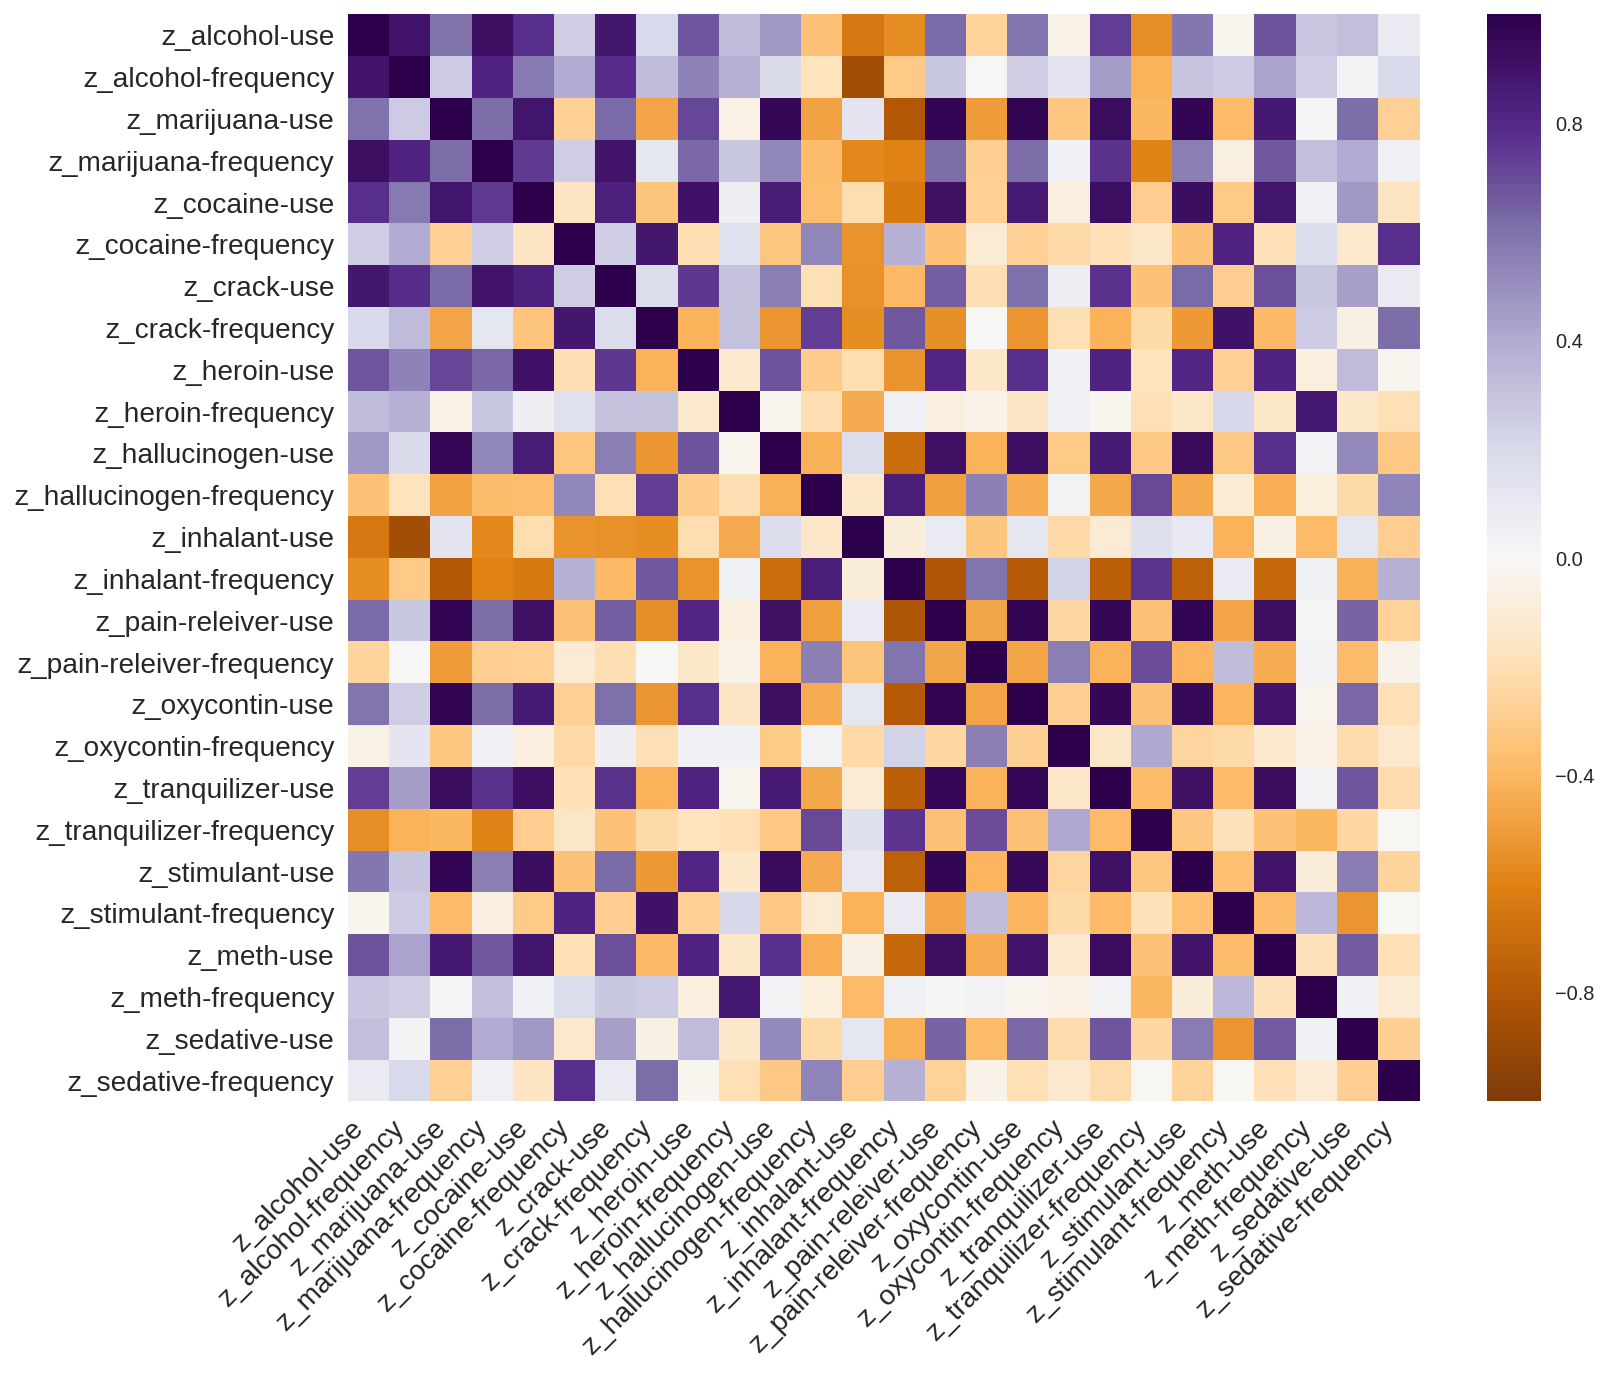

In [244]:
### Correlations between variables based on z-scores
drug_df.sort_index(axis=1)
fig, ax = plt.subplots(figsize=(12,10))
corr = drug_z.corr(method='pearson')
ax = sns.heatmap(corr, cmap="PuOr")

plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14);

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

## Research question and Hypotheses

** Does the use of one substance have an influence on the use of other drugs?** 

>Specifically, marijuana frequency will be positively correlated with the use of other depressants.

> And, cocaine frequency will be positively correlated with other stimulant use. 

> The use of depressants and stimulants will not vary between age groups



In [251]:
### Explore the correlation between Depressants and Stimulants
Depr_df = pd.DataFrame(data=drug_z[['z_alcohol-use','z_marijuana-use','z_pain-releiver-use','z_oxycontin-use',
                                  'z_tranquilizer-use', 'z_sedative-use','z_alcohol-frequency','z_marijuana-frequency','z_pain-releiver-frequency',
                                    'z_oxycontin-frequency','z_tranquilizer-frequency', 'z_sedative-frequency']])
Depr_df = Depr_df.set_index(drug_df['age'])

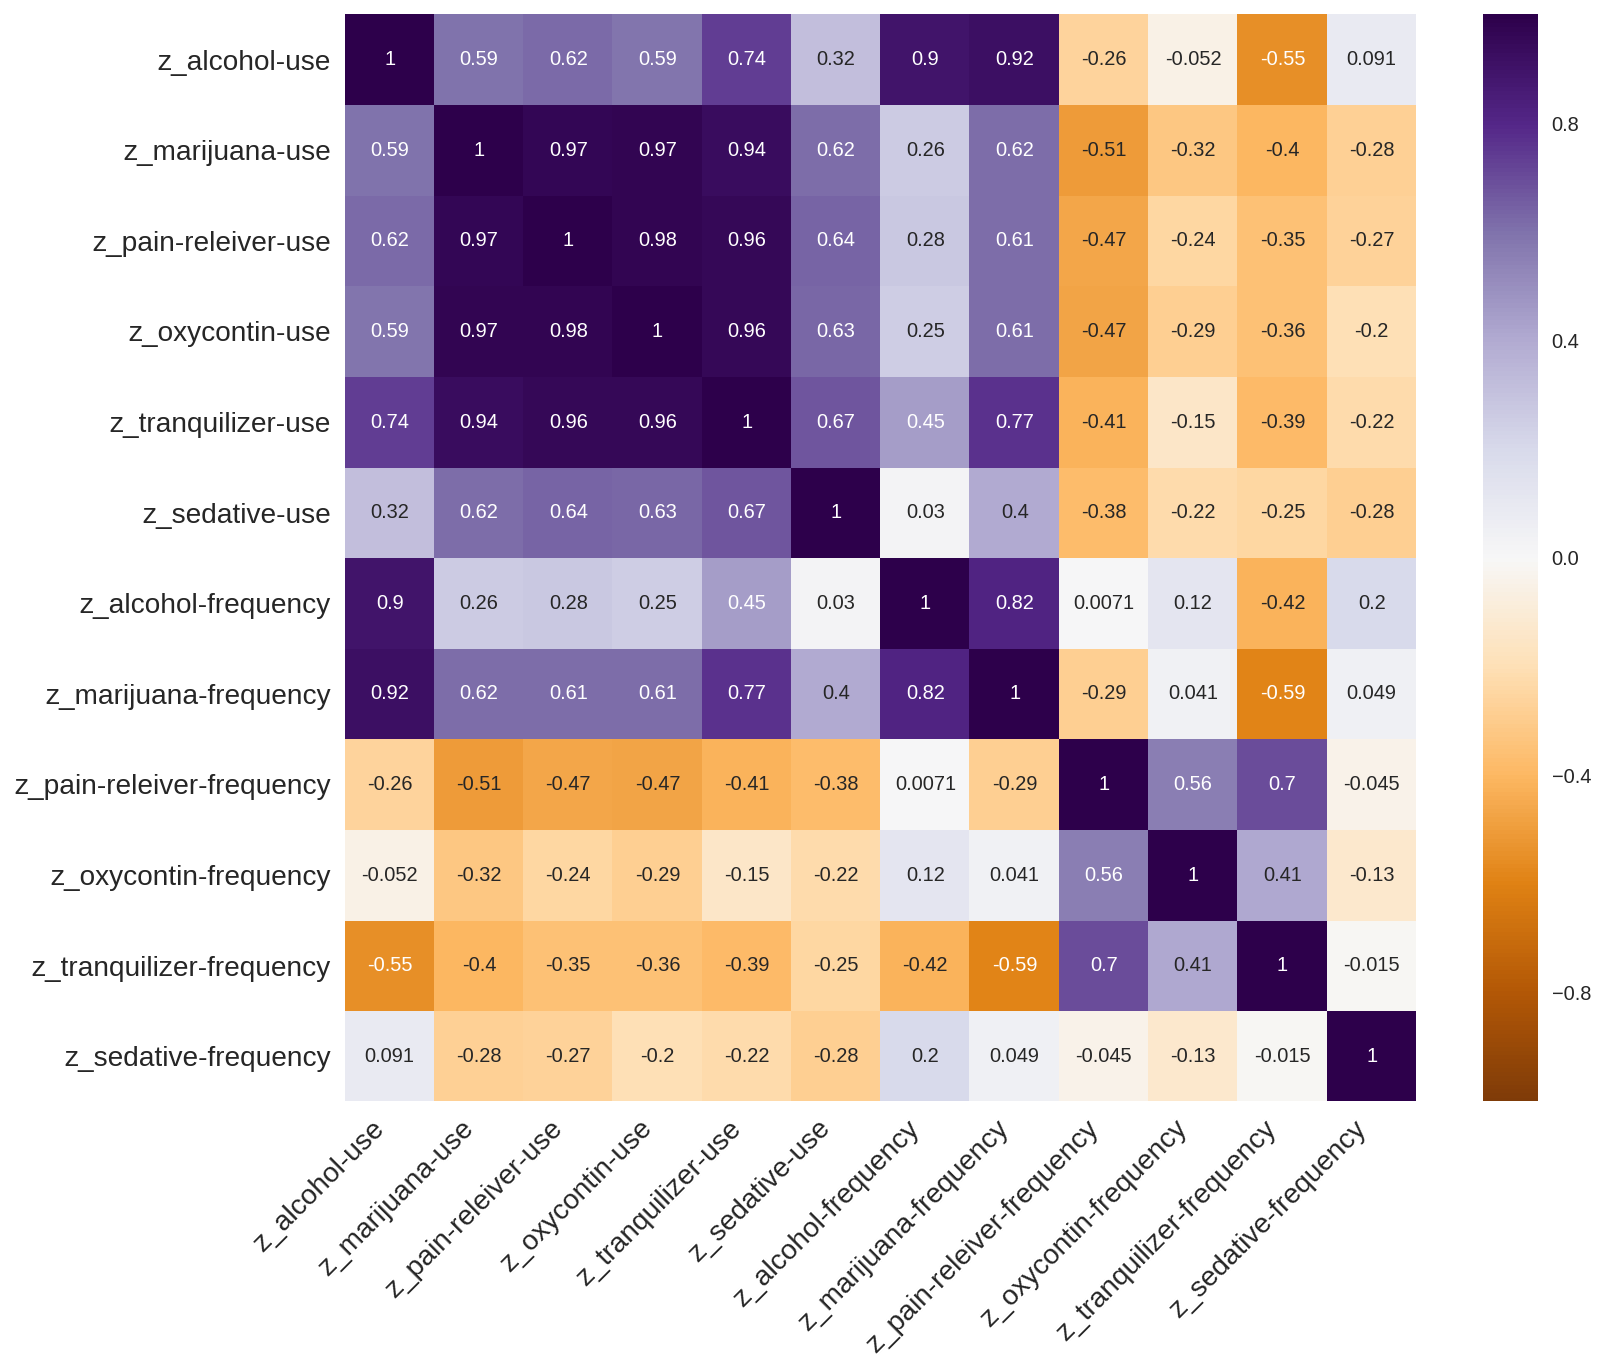

In [256]:
### Correlations between depressants based on z-scores

fig, ax = plt.subplots(figsize=(12,10))
corr = Depr_df.corr(method='pearson')
ax = sns.heatmap(corr, cmap="PuOr", annot=True)

plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14);

# Use of one depressant is positively correlated with use of another depressant
# Alcohol use is positively correlated with alcohol and marijuana frequency
# Frequency of pain - relievers positively correlated with tranquilizer frequency
# No correlations with oxycotin frequeny and any other factors

# Use - using one depressant leads to the likelyhood of using another depressant
# Frequency - people who drink more tend to smoke more weed, and use tranquizers 
# However, they are likely to use pain-releivers, oxycotin, tranquilizers and sedatives less frequently. 

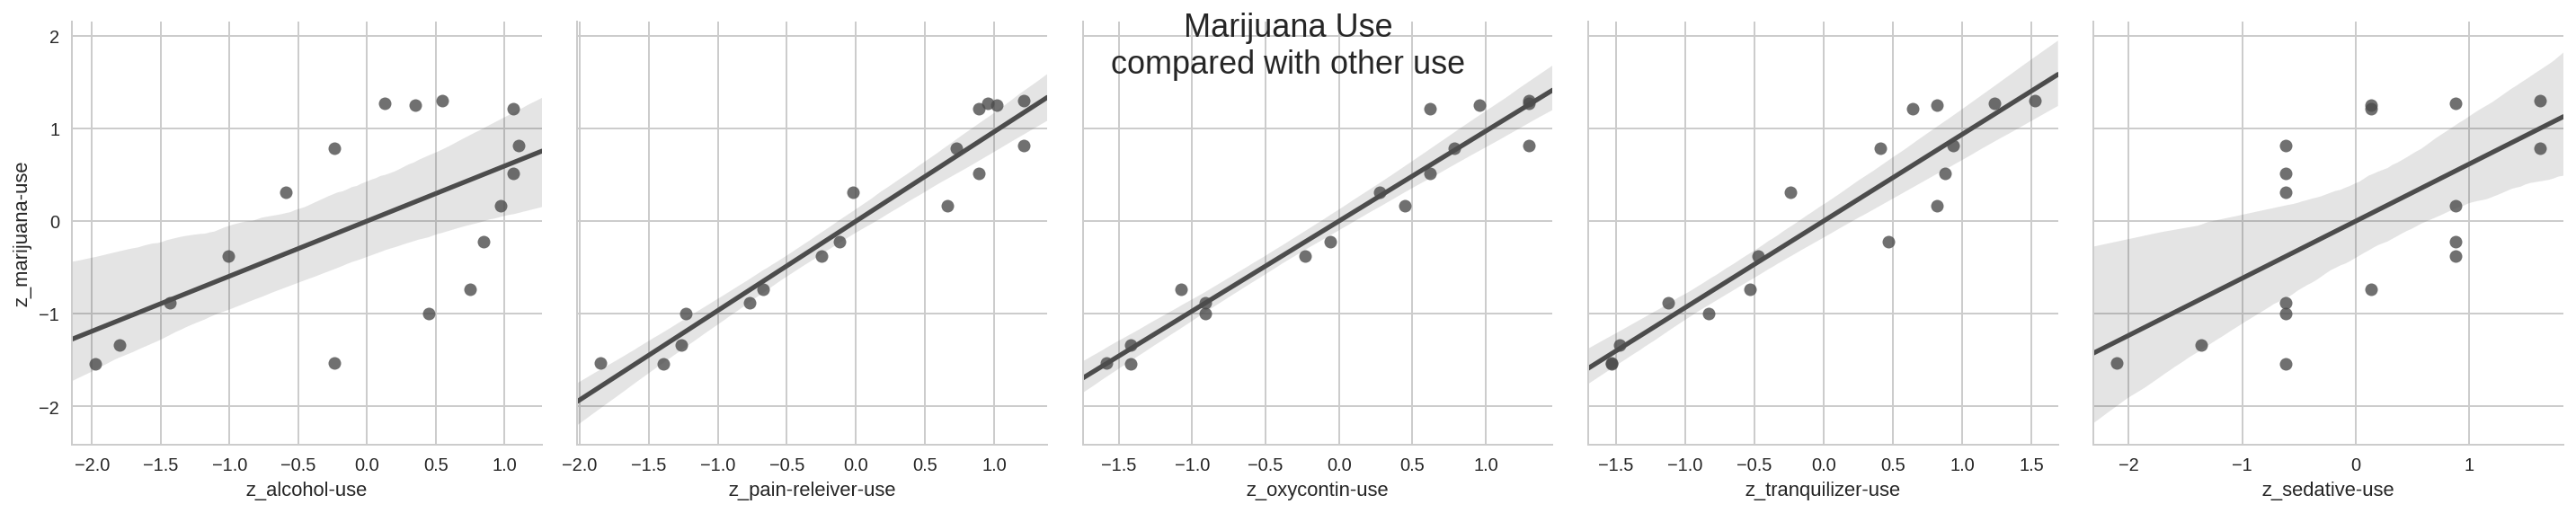

In [294]:
g = sns.PairGrid(Depr_df, y_vars=["z_marijuana-use"], x_vars=['z_alcohol-use','z_pain-releiver-use','z_oxycontin-use',
                                  'z_tranquilizer-use', 'z_sedative-use'], size=4)
g.map(sns.regplot, color=".3")
plt.suptitle('Marijuana Use\ncompared with other use', fontsize=18)
plt.tight_layout();

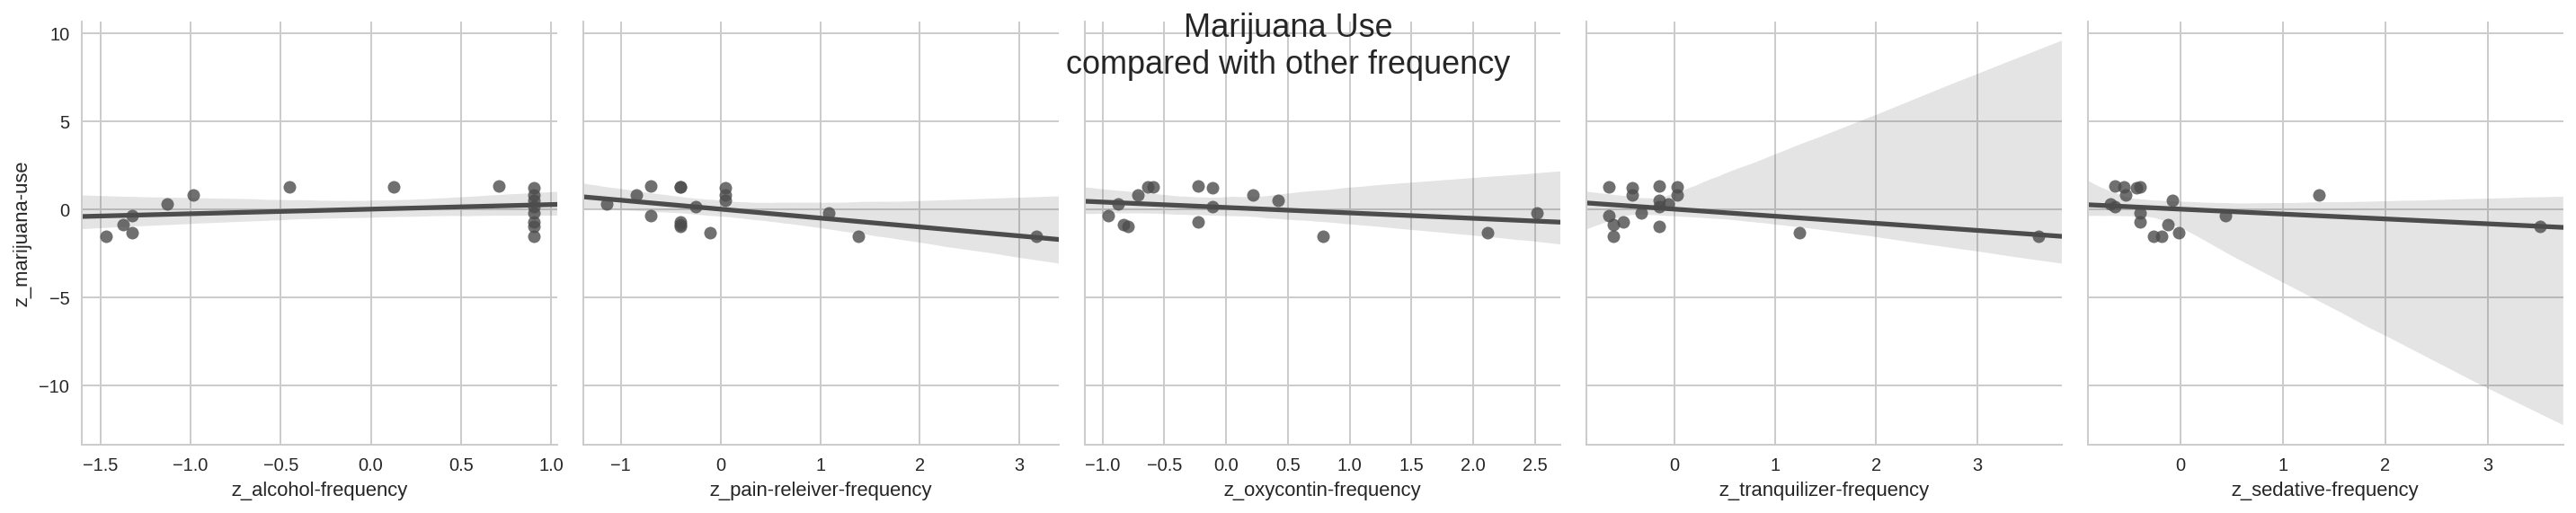

In [295]:
g = sns.PairGrid(Depr_df, y_vars=["z_marijuana-use"], x_vars=['z_alcohol-frequency','z_pain-releiver-frequency',
                                    'z_oxycontin-frequency','z_tranquilizer-frequency', 'z_sedative-frequency'], size=4)
g.map(sns.regplot, color=".3")
plt.suptitle('Marijuana Use\ncompared with other frequency', fontsize=18)
plt.tight_layout();

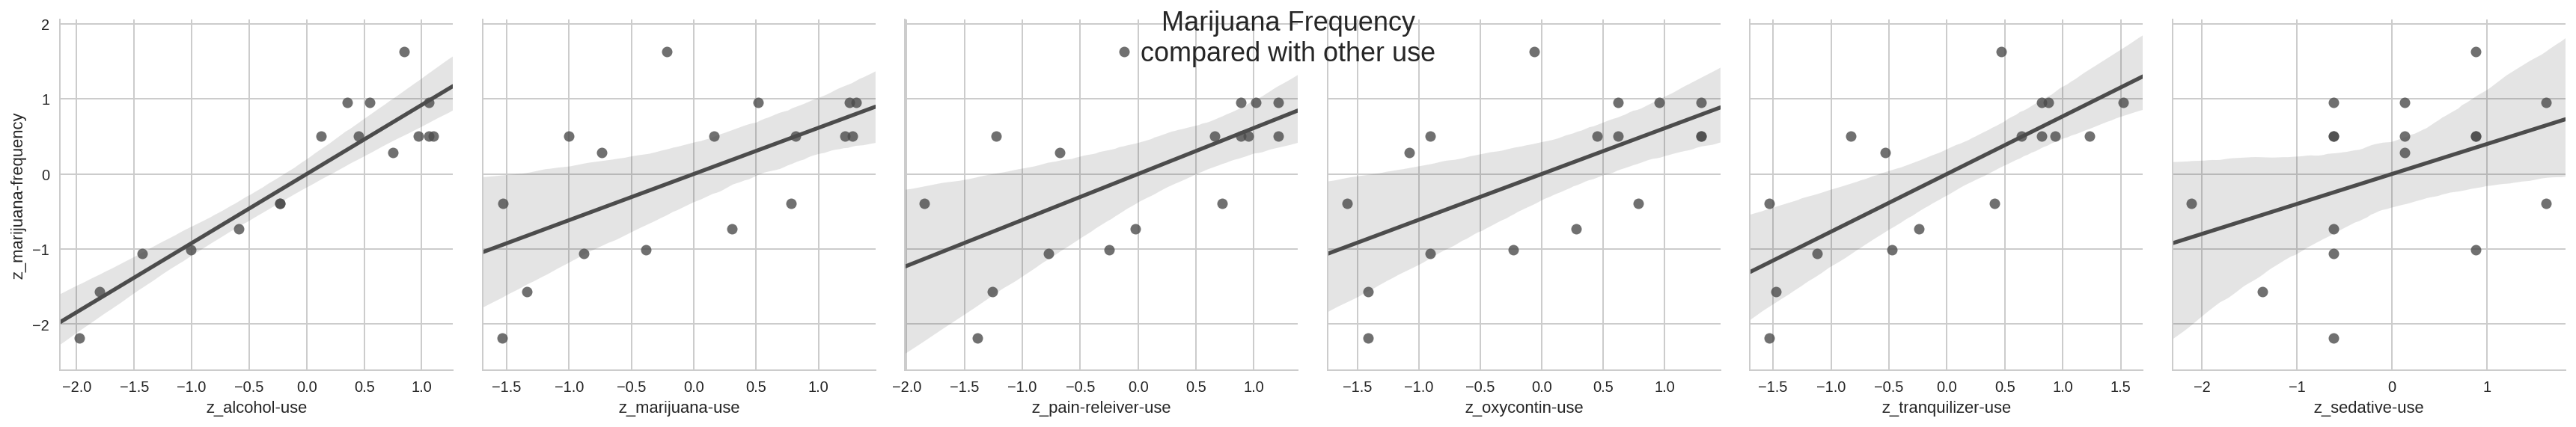

In [293]:
g = sns.PairGrid(Depr_df, y_vars=["z_marijuana-frequency"], x_vars=['z_alcohol-use','z_marijuana-use','z_pain-releiver-use','z_oxycontin-use',
                                  'z_tranquilizer-use', 'z_sedative-use'], size=4)
g.map(sns.regplot, color=".3")
plt.suptitle('Marijuana Frequency\ncompared with other use', fontsize=18)
plt.tight_layout();

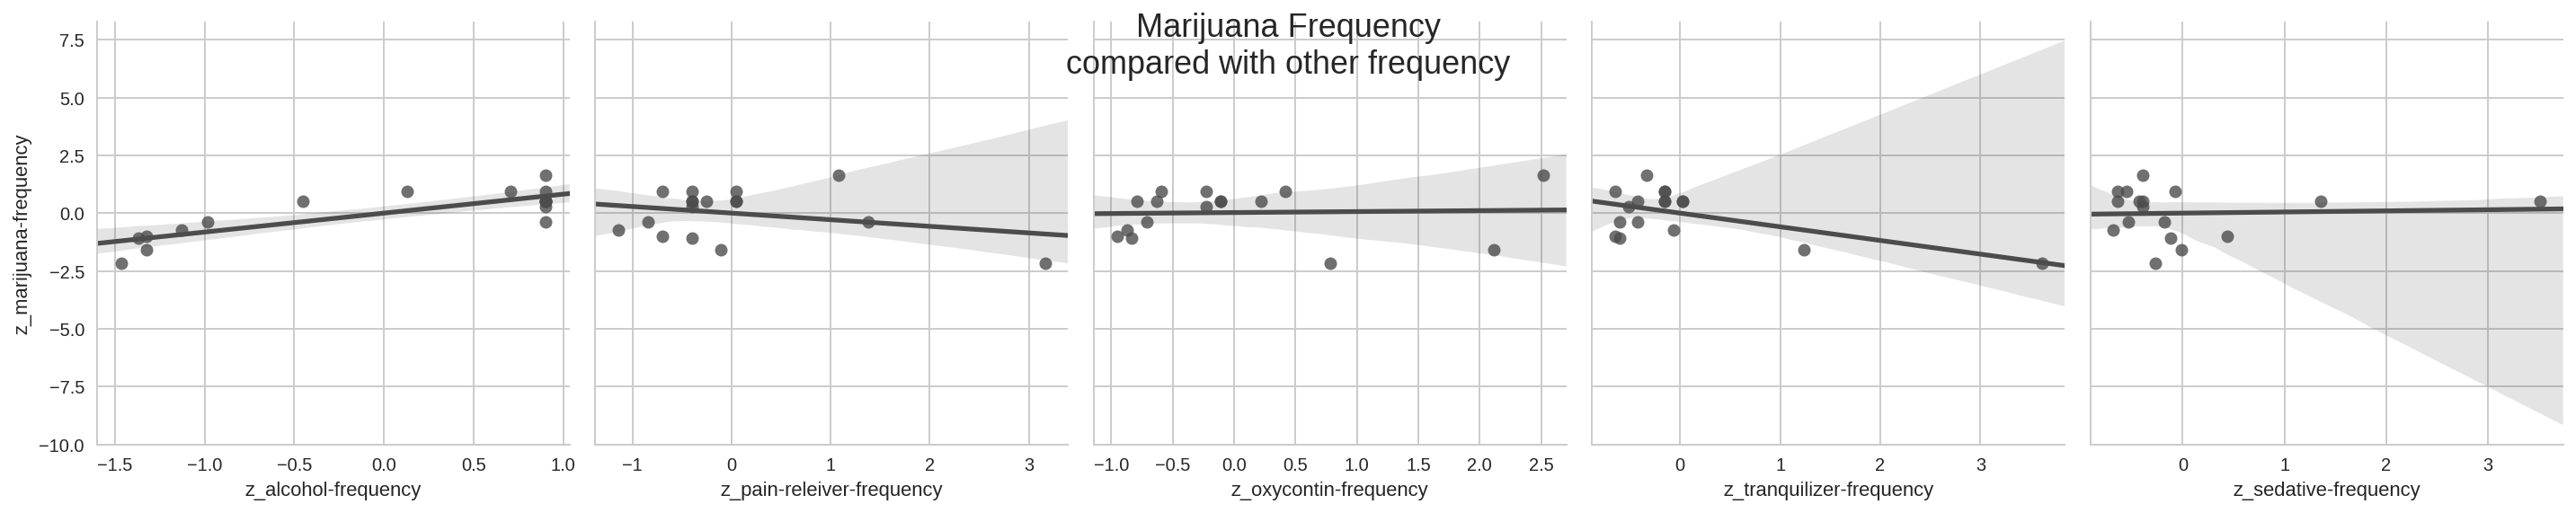

In [291]:
g = sns.PairGrid(Depr_df, y_vars=["z_marijuana-frequency"], x_vars=['z_alcohol-frequency','z_pain-releiver-frequency',
                                    'z_oxycontin-frequency','z_tranquilizer-frequency', 'z_sedative-frequency'], size=4)
g.map(sns.regplot, color=".3")
plt.suptitle('Marijuana Frequency\ncompared with other frequency', fontsize=18)
plt.tight_layout();

In [254]:
### Explore the correlation between Depressants and Stimulants
Stim_df = pd.DataFrame(data=drug_z[['z_cocaine-use','z_crack-use','z_heroin-use','z_hallucinogen-use','z_inhalant-use',
                                    'z_stimulant-use','z_meth-use','z_cocaine-frequency','z_crack-frequency','z_heroin-frequency',
                                    'z_hallucinogen-frequency','z_inhalant-frequency','z_stimulant-frequency','z_meth-frequency'
]])
Stim_df = Stim_df.set_index(drug_df['age'])

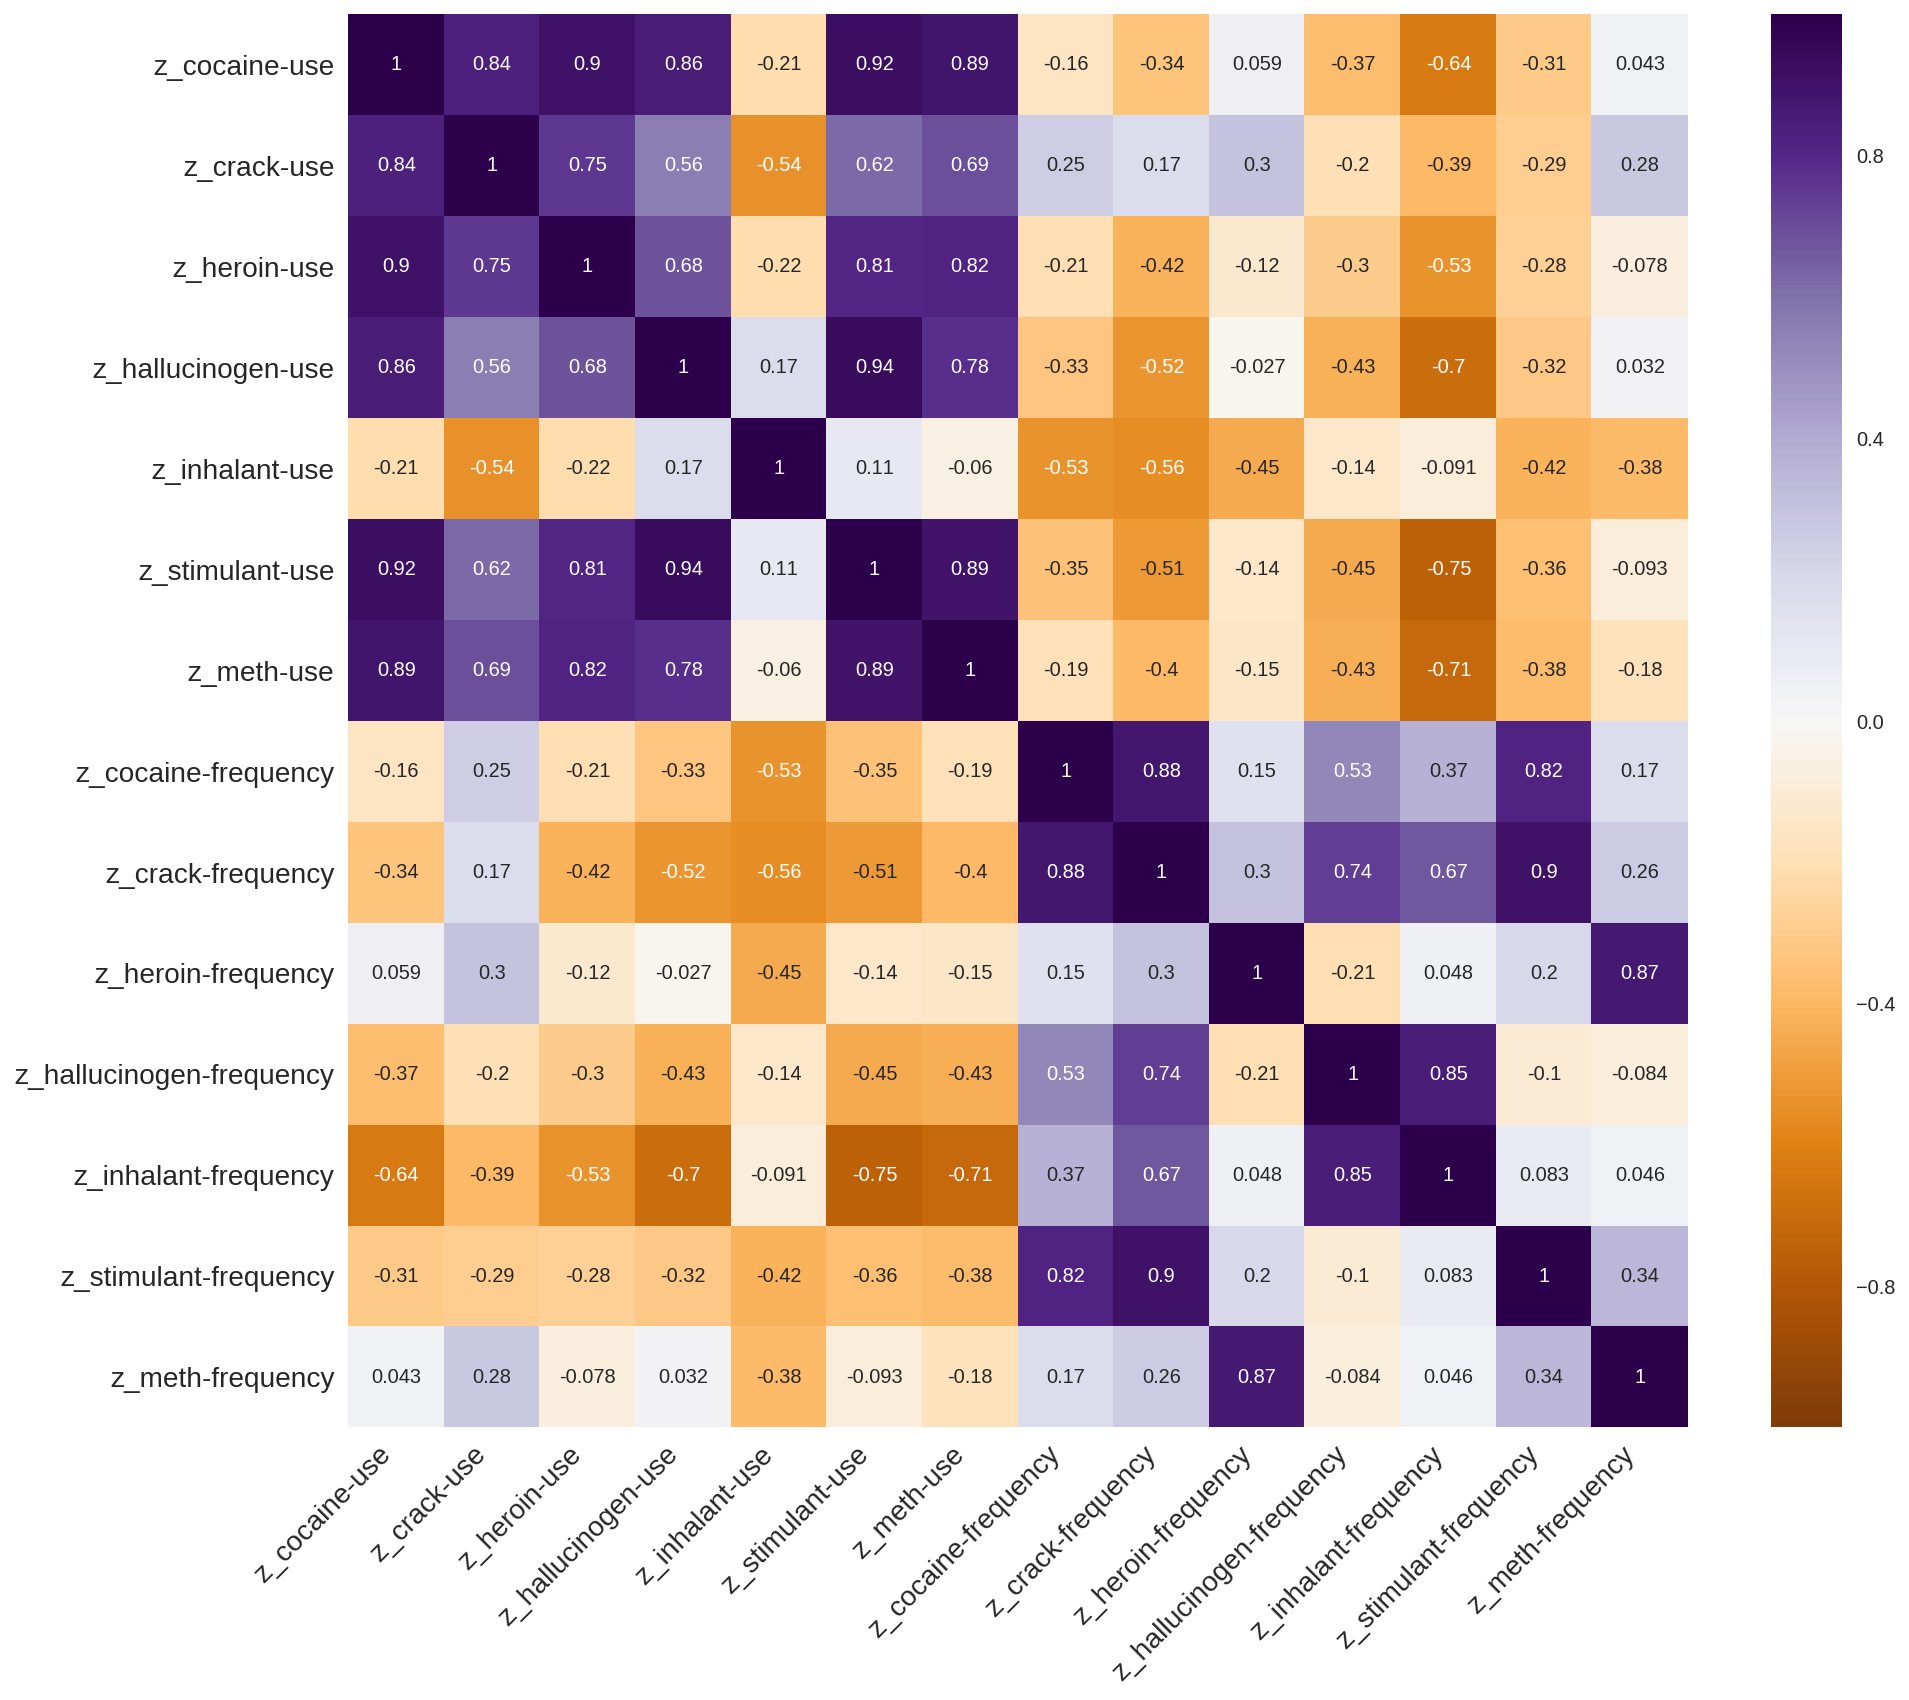

In [255]:
### Correlations between stimulants based on z-scores
drug_df.sort_index(axis=1)
fig, ax = plt.subplots(figsize=(15,13))
corr = Stim_df.corr(method='pearson')
ax = sns.heatmap(corr, cmap="PuOr",annot=True)

plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14);

# Use - Besides inhalants, use of one stimulant increases the likelihood of using another sitmulant
# Frequency - The frequency of stimulant and hallucinogens use was likely to decrease if other stimulants 
# were used

In [129]:
### Explore changes in depressant use habits over age, Using standardised values of use over time

Depr_use = pd.DataFrame(data=drug_z[['alcohol-use','marijuana-use','pain-releiver-use','oxycontin-use','tranquilizer-use', 'sedative-use']])
Depr_use.set_index(drug_df['age'],inplace=True)
Depr_use_age = Depr_use.apply(np.mean,axis=1)

In [130]:
### Explore changes in stimulant use habits over age, Using standardised values of use over time
Stim_use = pd.DataFrame(data=drug_z[['cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use',
                                    'stimulant-use','meth-use']])
Stim_use.set_index(drug_df['age'],inplace=True)
Stim_use_age = Stim_use.apply(np.mean,axis=1)

In [166]:
stim_depr = pd.DataFrame(data=drug_z[['cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','stimulant-use','meth-use','alcohol-use','marijuana-use','pain-releiver-use','oxycontin-use','tranquilizer-use', 'sedative-use']])
stim_depr = stim_depr.set_index(drug_df['age'])


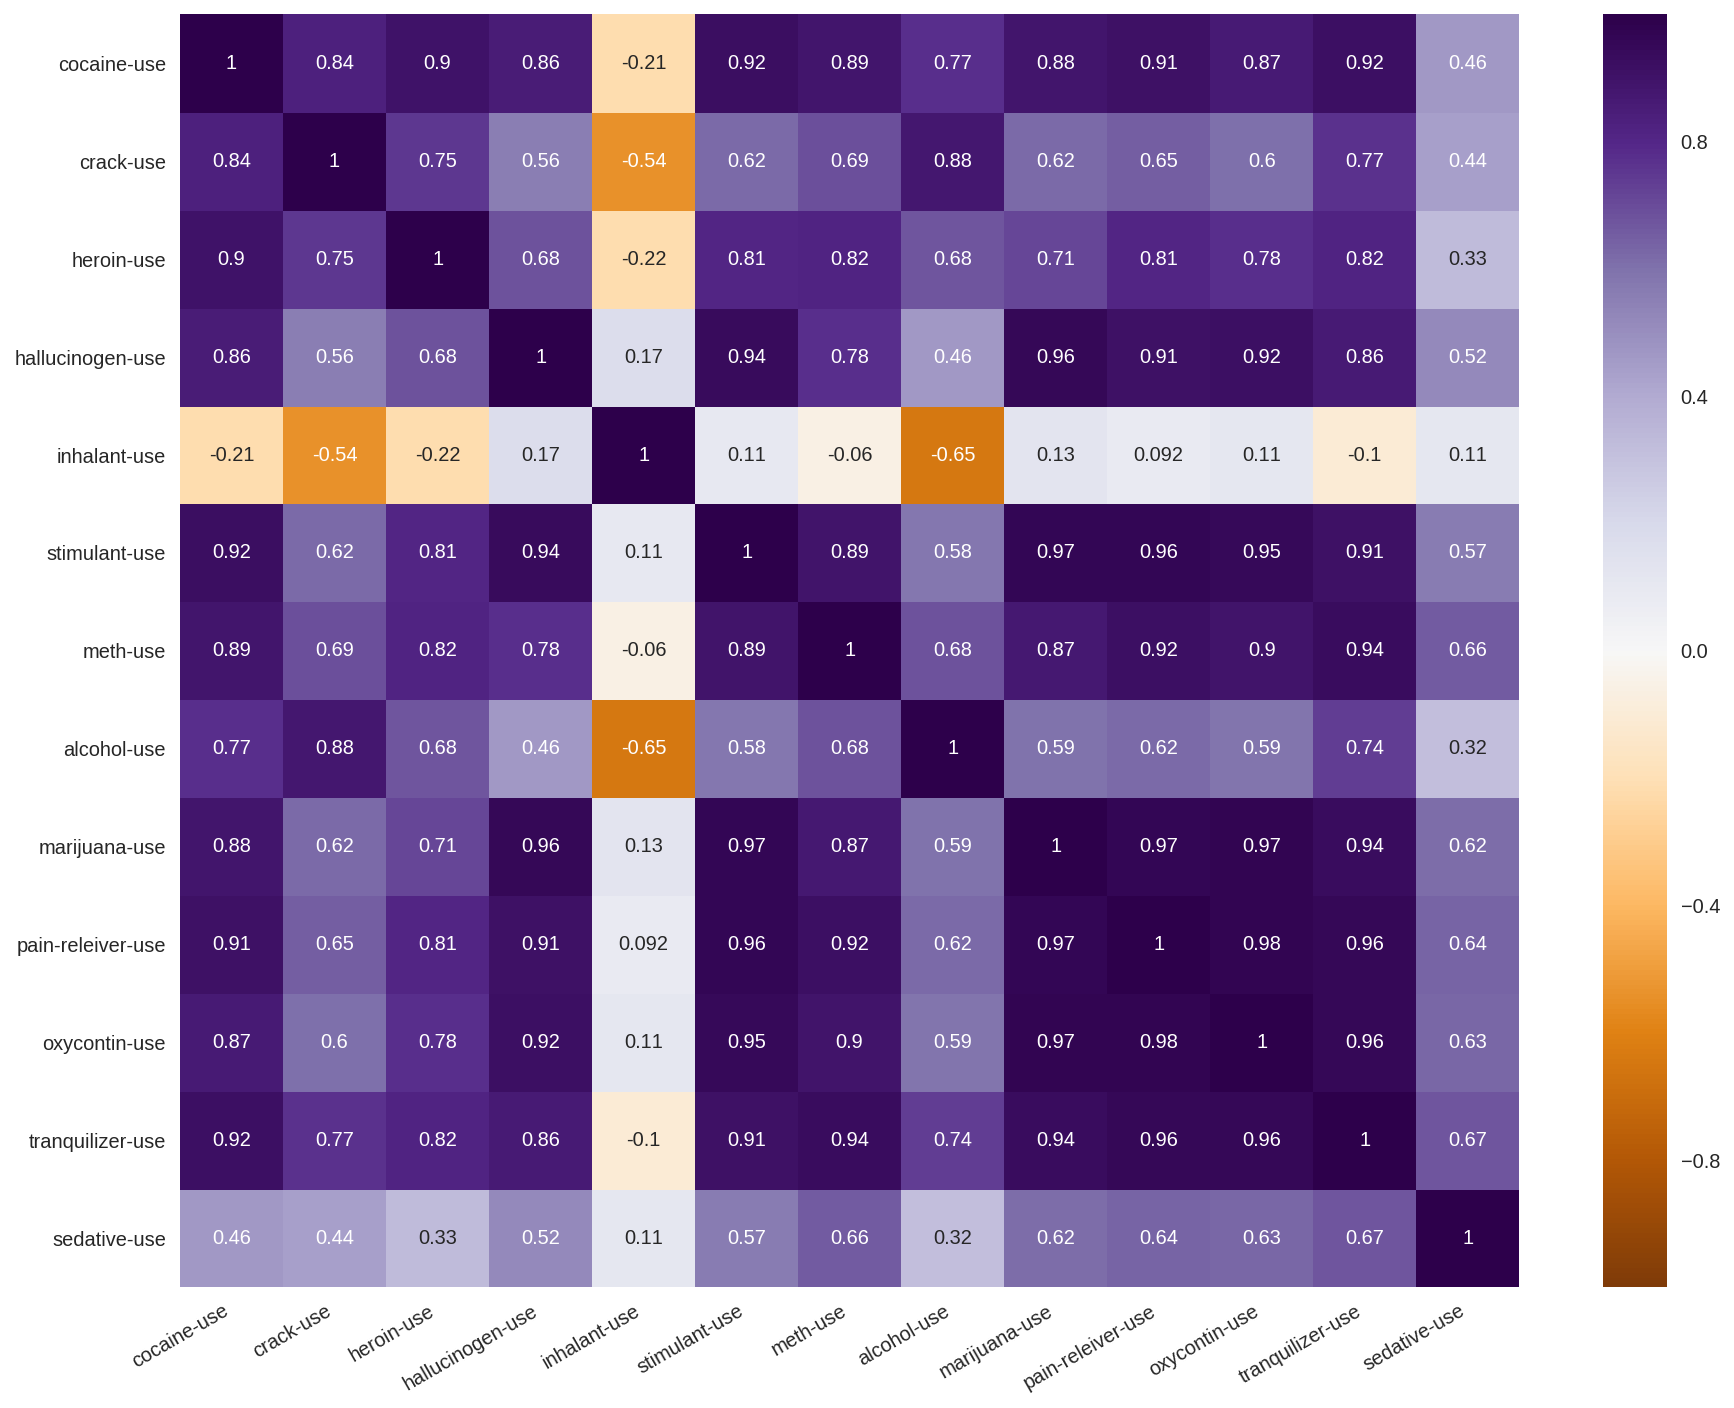

In [167]:
fig, ax = plt.subplots(figsize=(15,13))
corr = stim_depr.corr(method='pearson')
ax = sns.heatmap(corr, cmap="PuOr",annot=True)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

In [157]:
### Explore changes in depressant frequency habits over age, Using standardised values of use over time

Depr_freq = pd.DataFrame(data=drug_z[['alcohol-frequency','marijuana-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency', 'sedative-frequency']])
Depr_freq.set_index(drug_df['age'],inplace=True)
Depr_freq_age = Depr_freq.apply(np.mean,axis=1)

### Explore changes in stimulant frequency habits over age, Using standardised values of use over time
Stim_freq = pd.DataFrame(data=drug_z[['cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency',
                                    'stimulant-frequency','meth-frequency']])
Stim_freq.set_index(drug_df['age'],inplace=True)
Stim_freq_age = Stim_freq.apply(np.mean,axis=1)

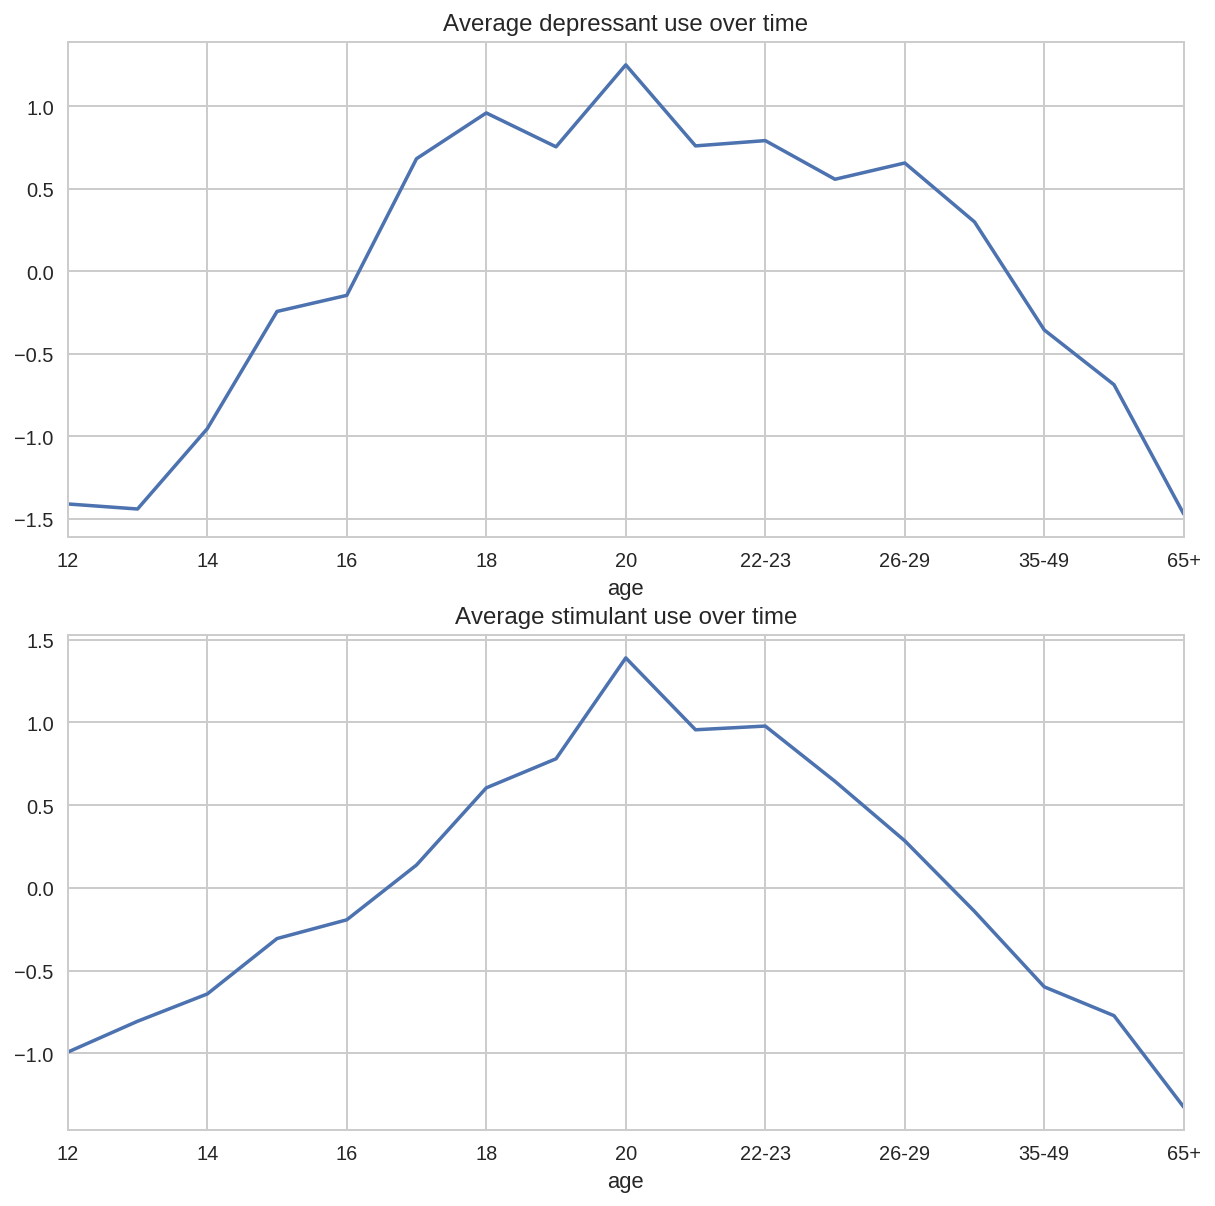

In [137]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.title('Average depressant use over time')
Depr_use_age.plot();

plt.subplot(2, 1, 2)
plt.title('Average stimulant use over time')
Stim_use_age.plot();
plt.show()

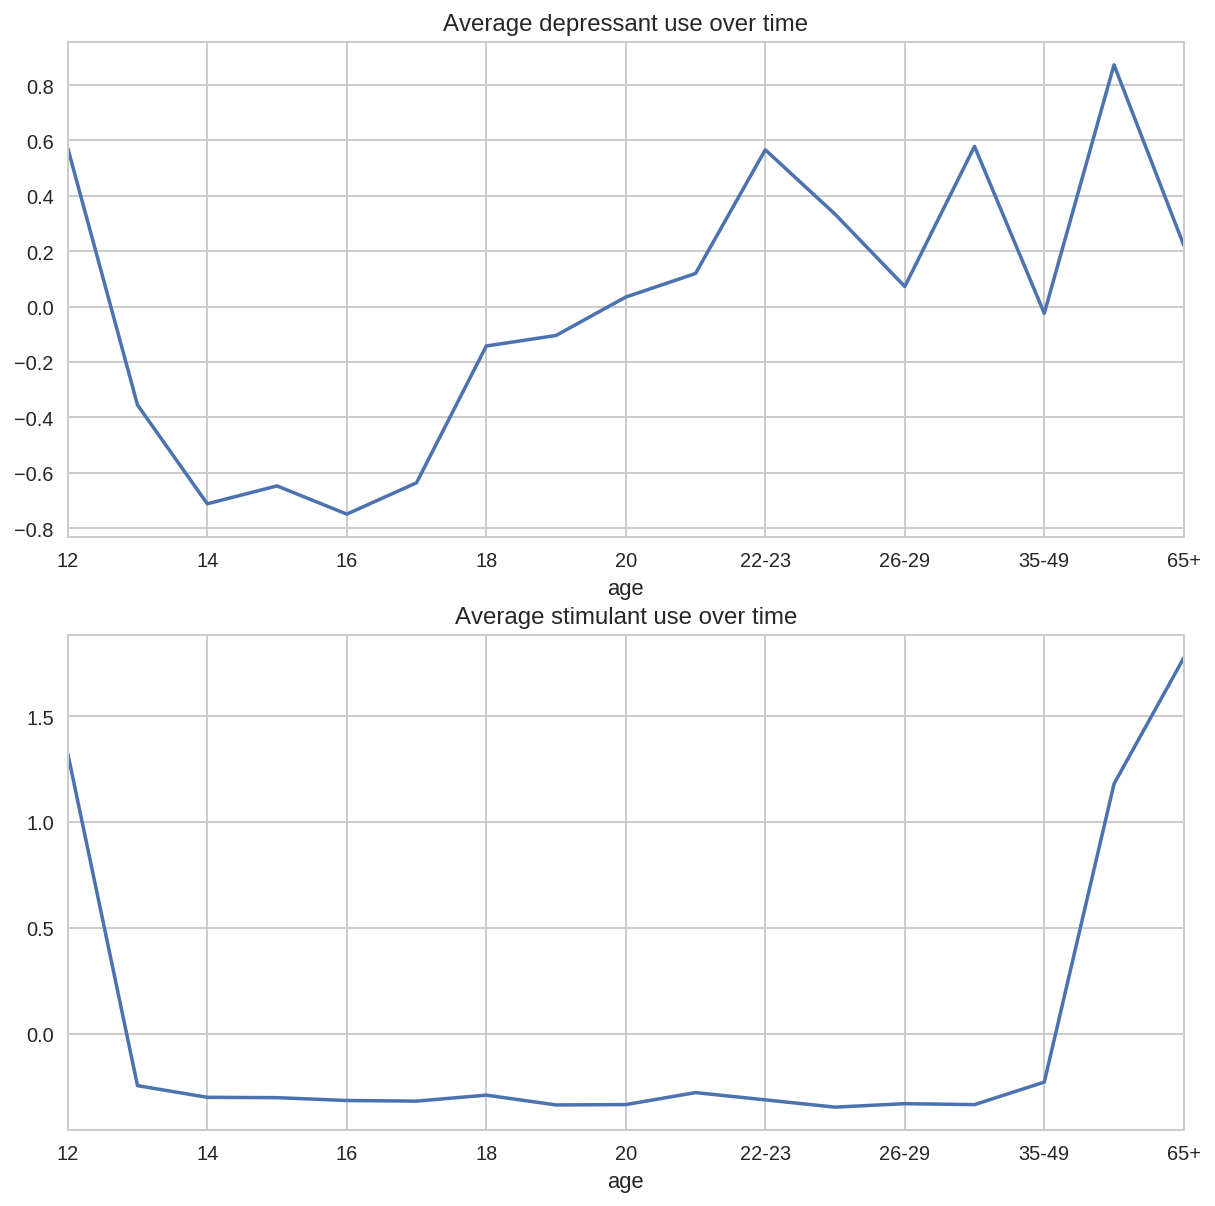

In [158]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.title('Average depressant use over time')
Depr_freq_age.plot();

plt.subplot(2, 1, 2)
plt.title('Average stimulant use over time')
Stim_freq_age.plot();
plt.show()

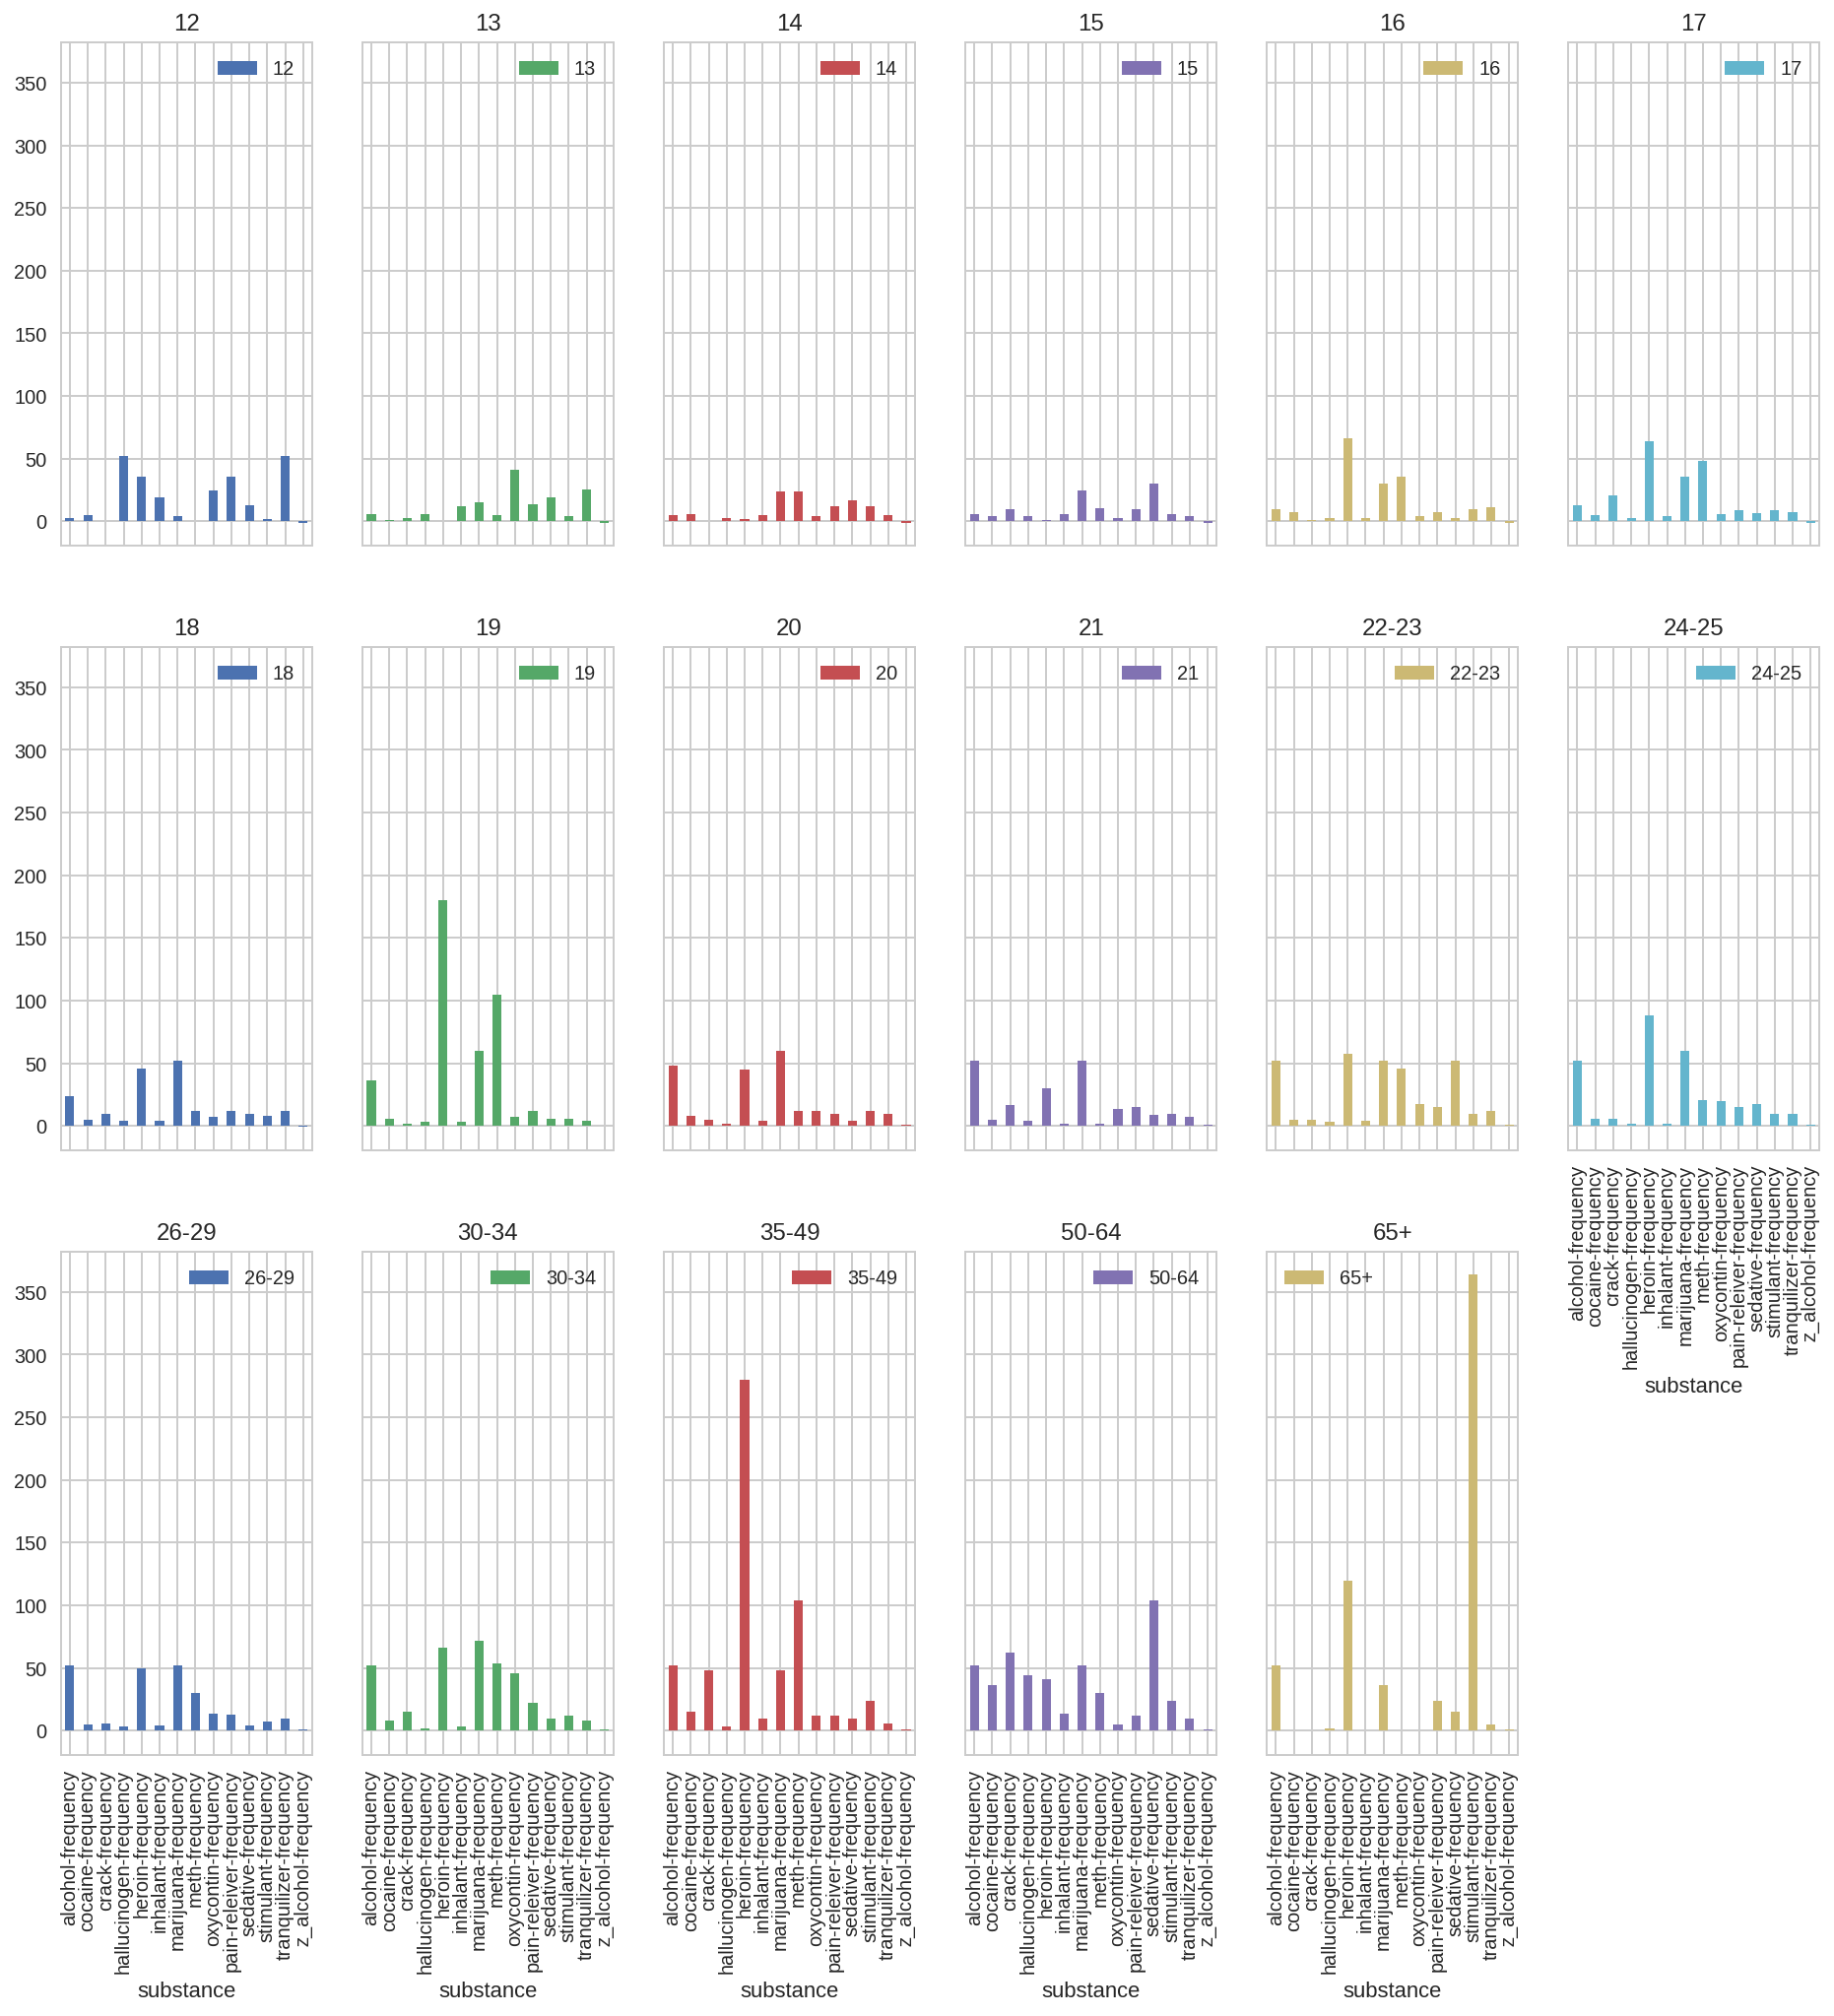

In [156]:
# What substances are used most frequently per age group
    # Look at overall substance use by age
    # Make long table of use_df  with columns -> age, substance and percentance
    # then group by age and get mean of substance use.
    # have to reset_index() 
#use_age = use_df.reset_index()
#long_use_age = use_age.melt(id_vars='age', var_name='substance')
#long_use_age.pivot(index='substance',columns='age',values= 'value').plot(kind='bar', subplots=True, figsize=(16,24), sharex=True, layout=(7, 3));

freq_age = freq_df.reset_index()
long_freq_age = freq_age.melt(id_vars='age', var_name='substance')
long_freq_age.pivot(index='substance',columns='age',values= 'value').plot(kind='bar', subplots=True, figsize=(16,16), sharex=True, sharey=True,layout=(3,6));

In [103]:
# limitations and further research

# what other factors influence drug use and frequency?
    # only have age and substance use data
    # socioeconomic, education, location, employment...
    # use of depressants and stimulants probably depends on other factors

#Conclusion
# There is a correlation between the types of drugs people use and their likelihood of using other similar drugs
# Drug use over time peaks around 20 years of age and declines afterward

**Report**

#Does the frequency of substance use influence the use of another substance? 

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

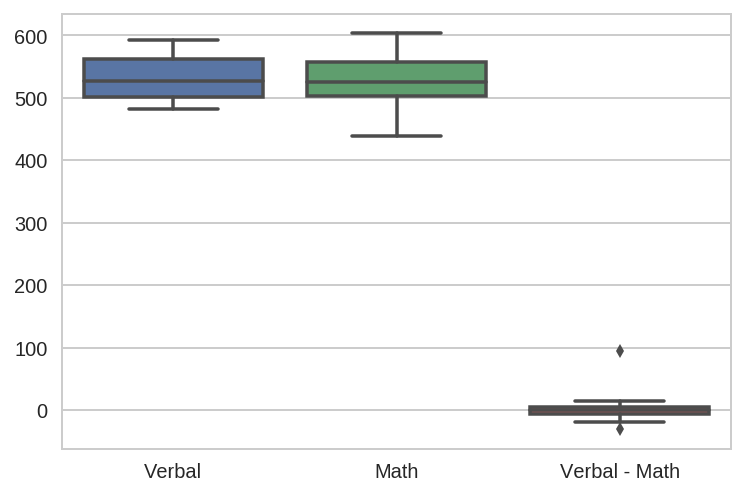

In [869]:
new_sat_df = sat_scores_df[['State','Verbal', 'Math','Verbal - Math']]
sns.boxplot(new_sat_df)

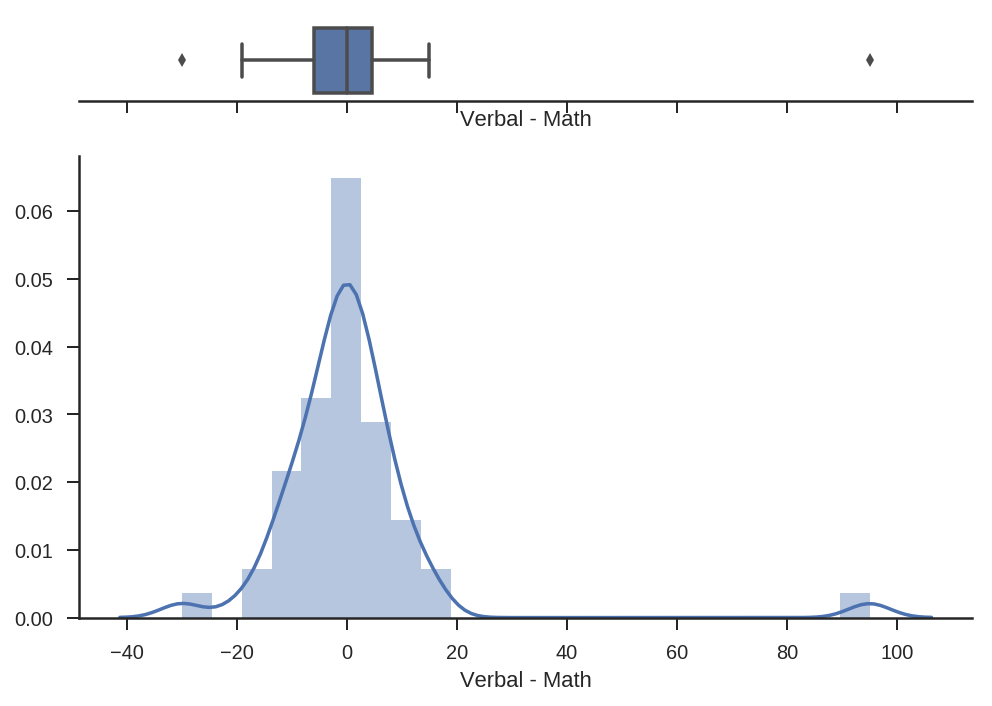

In [870]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(new_sat_df['Verbal - Math'], ax=ax_box)
sns.distplot(new_sat_df['Verbal - Math'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [871]:
# the variable indicating the difference between verbal and math scores (Verbal - Math)
# has an outlier
# An outlier is any data point that is further away that 2.5 standard deviations from the mean in 
# a normal distribution 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [872]:
# Both the spearman correlation and pearson correlation assess the relationship between two variables. 

# searman correlation ranks the two variables, takes the difference 
# between each variable's corresponding data points and 
# squares the difference. 
# Then the difference squared is multiplied by 6 and divided by 
# the square of the sample size, minus one and then multipled by 
# the sample size. This amount is deducted from 1 to give the 
# spearman correlation (rho).

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [876]:
rate_list = np.array(sat_scores_df['Rate'])

for index, num in enumerate(rate_list):
    new_num = stats.percentileofscore(rate_list,kind='rank', score=num)
    sat_scores_df.loc[index, 'Rank'] = round(new_num, 2)

In [889]:
sat_scores_df[sat_scores_df['State'] == 'CA']

State  Rate  Verbal  Math  Verbal - Math   Rank
23    CA    51     498   517            -19  55.88

In [ ]:
# The spearman correlation is based on a variable's ranking as is percentile ranking

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
# Percentiles "even out the playing field". Outliers that fall outside of the normal distribution will not be
# weighted any more or less  

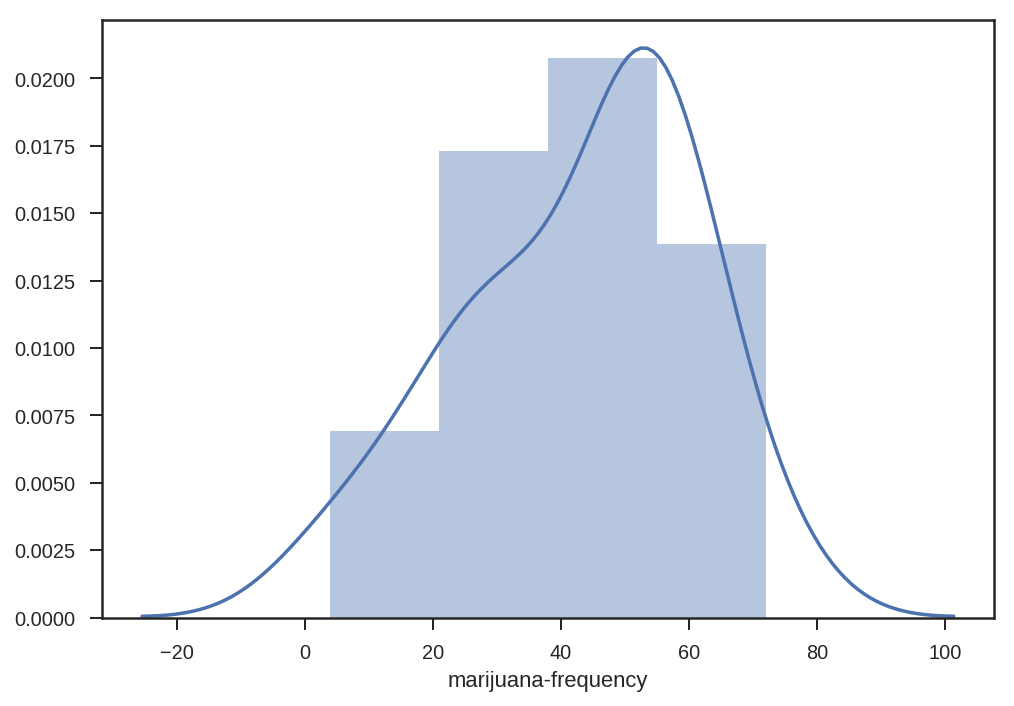

In [894]:
sns.distplot(drug_df['marijuana-frequency'])

In [899]:
drug_df_new = pd.DataFrame()
rate_list = np.array(drug_df['marijuana-frequency'])

for index, num in enumerate(rate_list):
    new_num = stats.percentileofscore(rate_list,kind='rank', score=num)
    drug_df_new.loc[index, 'Rank'] = round(new_num, 2)

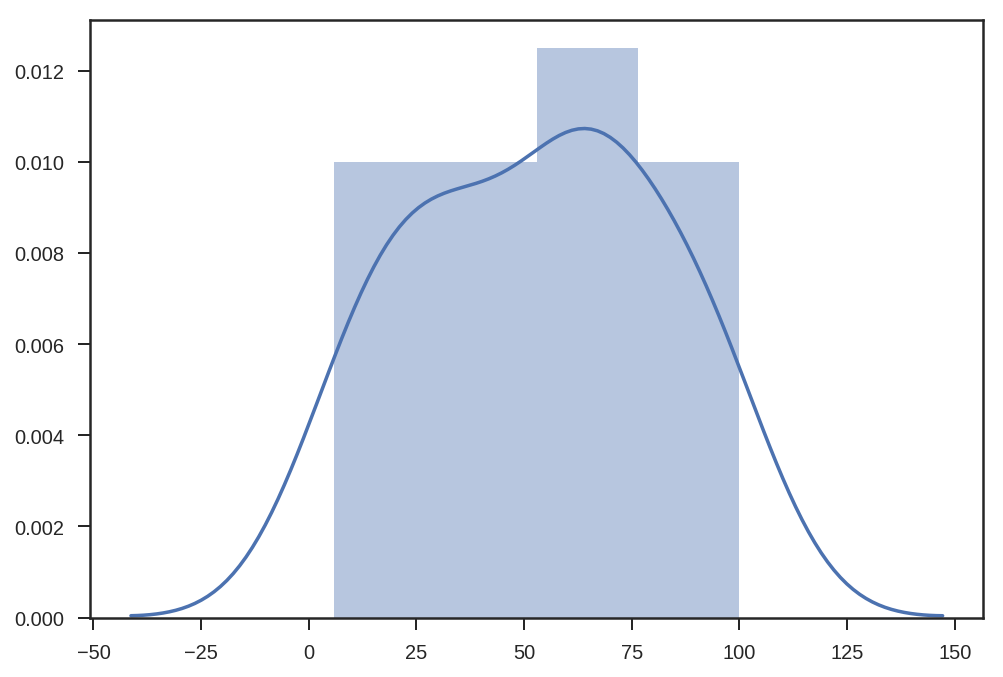

In [907]:
sns.distplot(drug_df_new)